# **Retreive and Analyse Market Data on European Films**

## 1 - Import Modules and Connect OS Drive

In [ ]:
!pip install unidecode
!pip install -U kaleido # need to restart

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.9 MB/s eta 0:00:00


In [ ]:
# General Libraries
import os
import numpy as np
import pandas as pd
import nltk
import re
import unidecode
nltk.download('punkt')
from scipy import interpolate
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from scipy.interpolate import interp1d
import kaleido


# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# For Scrapping
import requests
import sqlalchemy
import requests
from bs4 import BeautifulSoup
from warnings import warn
import re

# Other
from matplotlib.ticker import MaxNLocator
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from IPython.display import display, HTML
from scipy.optimize import curve_fit
from numpy.polynomial.polynomial import Polynomial


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
#Connect Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define Export/Import Path
path = '/content/drive/MyDrive/Exports Cineuropa/'
date="09092024" # Update this to name new exported files

Mounted at /content/drive


## 2 - Retreive Publicly Available Data (LUMIERE and IMDb)

In [ ]:
# Store Data

id=[]
title=[]
year=[]
production_countries=[]
directors=[]
total_admissions_obs=[]
total_admissions_eu28 = []

# Identify the 44 European countries of the LUMIERE Database

countries=["AT","BA","BE","BG","BY","CH","CY","CZ","DE","DK","EE","ES","FI","FR","GB","GR","HR","HU","IE","IC","IT","LI","LT","LU","LV","MC","MD","ME","MK","MT","NL","NO","PL","PT","RO","RS","RU","SE","SI","SK","TR","RU","UA","XK",]

In [ ]:
# Retreive data for films from LUMIERE. Results may vary according to updates in the database.
# Fourty-four countries of production, limited to the first 200 titles, per year, per country (exlcudes a few films in the most producting countries such as France).

cookies = {
    'dtCookie': 'v_4_srv_7_sn_C3DA38C1DDFF57CA84C15FE0062DFEC7_perc_100000_ol_0_mul_1_app-3A36637b77c52b10ae_1_rcs-3Acss_1',
}

headers = {
    'Accept': 'application/json, text/*',
    'Accept-Language': 'fr-FR,fr;q=0.9,en-US;q=0.8,en;q=0.7',
    'Connection': 'keep-alive',
    'Content-Type': 'application/json; charset=UTF-8',
    #'Content-Length':"1000",
    'Origin': 'https://lumiere.obs.coe.int',
    'Referer': 'https://lumiere.obs.coe.int/search',
    'Sec-Fetch-Dest': 'empty',
    'Sec-Fetch-Mode': 'cors',
    'Sec-Fetch-Site': 'same-origin',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36',
    'sec-ch-ua': '"Not_A Brand";v="8", "Chromium";v="120", "Google Chrome";v="120"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
}

for x in countries:
  for i in range(2001,2023):
    #i_1=str(i)
    i_2=str(i+1)
    data = '{"prod_start_year":2002,"prod_end_year":2002,"exp_start_year":1996,"exp_end_year":2023,"include_minority_coproducing_country":true,"production_country":"FR"}'
    data2=data.replace("2002",i_2)
    data3=data2.replace("FR",x)
    print(x,i_2)

    try:
      response = requests.post('https://lumiere.obs.coe.int/api/movies', headers=headers, cookies=cookies, data=data3)

      results_movies=response.json()

      for  result in results_movies:

        id.append(result["id"])

        title.append(result["original_title"])

        year.append(result["prod_year"])

        production_countries.append(result['production_countries'])

        directors.append(result['directors'])

        total_admissions_obs.append(result['total_admissions_obs'])

    except Exception as e:
      id.append(np.nan)

      title.append(np.nan)

      year.append(np.nan)

      production_countries.append(np.nan)

      directors.append(np.nan)

      total_admissions_obs.append(np.nan)

AT 2002
AT 2003
AT 2004
AT 2005
AT 2006
AT 2007
AT 2008
AT 2009
AT 2010
AT 2011
AT 2012
AT 2013
AT 2014
AT 2015
AT 2016
AT 2017
AT 2018
AT 2019
AT 2020
AT 2021
AT 2022
AT 2023
BA 2002
BA 2003
BA 2004
BA 2005
BA 2006
BA 2007
BA 2008
BA 2009
BA 2010
BA 2011
BA 2012
BA 2013
BA 2014
BA 2015
BA 2016
BA 2017
BA 2018
BA 2019
BA 2020
BA 2021
BA 2022
BA 2023
BE 2002
BE 2003
BE 2004
BE 2005
BE 2006
BE 2007
BE 2008
BE 2009
BE 2010
BE 2011
BE 2012
BE 2013
BE 2014
BE 2015
BE 2016
BE 2017
BE 2018
BE 2019
BE 2020
BE 2021
BE 2022
BE 2023
BG 2002
BG 2003
BG 2004
BG 2005
BG 2006
BG 2007
BG 2008
BG 2009
BG 2010
BG 2011
BG 2012
BG 2013
BG 2014
BG 2015
BG 2016
BG 2017
BG 2018
BG 2019
BG 2020
BG 2021
BG 2022
BG 2023
BY 2002
BY 2003
BY 2004
BY 2005
BY 2006
BY 2007
BY 2008
BY 2009
BY 2010
BY 2011
BY 2012
BY 2013
BY 2014
BY 2015
BY 2016
BY 2017
BY 2018
BY 2019
BY 2020
BY 2021
BY 2022
BY 2023
CH 2002
CH 2003
CH 2004
CH 2005
CH 2006
CH 2007
CH 2008
CH 2009
CH 2010
CH 2011
CH 2012
CH 2013
CH 2014
CH 2015
CH 2016


In [ ]:
# Verify the number of unique ID (every film is associated to a single ID in the Lumiere Database) Numbers may vary following updates on the LUMIERE database
print(len(id))
print(any(np.isnan(value) if isinstance(value, (int, float)) else False for value in id))
print(len(list(set(id))))

45724
False
34724


In [ ]:
# Create a Dataframe with the retreived values
movies_df=pd.DataFrame({'ID':id,'title':title,'year':year,'country':production_countries,"director":directors,'admissions':total_admissions_obs})

In [ ]:
# Drop any duplicates
movies_df=movies_df.drop_duplicates(subset=['ID'])
movies_df

,ID,title,year,country,director,admissions
0,19685,Poppitz,2002,AT,Harald Sicheritz,456908
1,19722,Im toten Winkel - Hitlers Sekretärin,2002,AT,"André Heller, Othmar Schmiderer",92032
2,19901,Blue Moon,2002,AT,Andrea Maria Dusl,89033
3,27189,Am anderen Ende der Brücke,2002,"AT, CN",Mei Hu,29099
4,18917,Meine Schwester Maria,2002,"AT, DE, CH",Maximilian Schell,15559
...,...,...,...,...,...,...
45705,253754,Cirku Fluturues,2019,XK,Fatos Berisha,154
45707,237335,Zana,2019,"XK, AL, US, GE",Antoneta Kastrati,32
45712,162882,La colline où rugissent les lionnes,2021,"FR, XK, US",Luàna Bajrami,11289
45718,460547,"As I Was Looking Above, I Could See Myself Und...",2022,XK,Ilir Hasanaj,50


In [ ]:
# Export Database
movies_df.to_excel(path+'moviesOBS'+date+'.xlsx', index=False)

## 3 - Further Data Analysis






### 3.1 - Import Data


In [ ]:
#Import existing DataFrame with the sentiment score of critical reviews (Cineuropa, Variety, Hollywood Reporter, Screen Daily)
df = pd.read_csv(path+'MasterSentiment03012023.csv')
df

,Unnamed: 0,ID,url,title,original_title,director,year,country,cineuropa_review_author,cineuropa_review_text,...,hollywoodreporter_review_date,screendaily_review_author,screendaily_review_text,screendaily_review_date,rottentomatoes_tomatometer_score,rottentomatoes_audience_score,Predicted Sentiment Cineuropa,Predicted Sentiment Variety,Predicted Sentiment Hollywood Reporter,Predicted Sentiment Screen Daily
0,0,1,https://www.cineuropa.org/en/newsdetail/431794/,The Innocent,L'Innocent,Louis Garrel,2022,France,Louis Garrel,Not all of Louis Garrel's films as a director ...,...,NaN,NaN,\n\nSource: Wild Bunch International\n\n’The I...,25/05/2022,NaN,NaN,1.000000,NaN,NaN,0.55
1,1,2,https://www.cineuropa.org/en/newsdetail/431796/,Venus,Venus,Jaume Balagueró,2022,Spain,Jaume Balagueró,"In her book Reina del grito, Spanish critic De...",...,NaN,NaN,NaN,NaN,NaN,NaN,0.850000,NaN,NaN,NaN
2,2,3,https://www.cineuropa.org/en/newsdetail/431727/,Eagles from Țaga,Vulturii din Țaga,"Iulian Manuel Ghervas, Adina Popescu",2022,"Romania, Slovakia","Iulian Manuel Ghervas, Adina Popescu",After making its international debut in August...,...,NaN,NaN,NaN,NaN,NaN,NaN,0.666667,NaN,NaN,NaN
3,3,4,https://www.cineuropa.org/en/newsdetail/431679/,Amazing Elisa,Asombrosa Elisa,Sadrac González-Perellón,2022,Spain,Sadrac González-Perellón,In Amazing Elisa [+see also: trailerfilm profi...,...,NaN,NaN,NaN,NaN,NaN,NaN,0.590909,NaN,NaN,NaN
4,4,5,https://www.cineuropa.org/en/newsdetail/431691/,Roald Dahl's Matilda the Musical,Roald Dahl's Matilda the Musical,Matthew Warchus,2022,"United Kingdom, United States",Matthew Warchus,When you go to see a modern Marvel Comics adap...,...,NaN,NaN,NaN,NaN,100.0,NaN,0.428571,0.7,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5755,5755,5898,https://www.cineuropa.org/en/newsdetail/51224/,Live and Become,"Va, vis et deviens",Radu Mihaileanu,2005,"France, Italy, Israel, Belgium",Radu Mihaileanu,"""Cry now, if you want"". These words, uttered r...",...,NaN,Dan Fainaru,Dir.Radu Mihaileanu. Fr-Is-It-Bel. 2005. 153mi...,30/03/2005,88.0,93.0,NaN,NaN,NaN,NaN
5756,5756,5899,https://www.cineuropa.org/en/newsdetail/51042/,I Like to Work (Mobbing),Mi piace lavorare,Francesca Comencini,2004,Italy,Francesca Comencini,"Neons, impersonal corridors, small stall-offic...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5757,5757,5900,https://www.cineuropa.org/en/newsdetail/50941/,ANDRE VALENTE,ANDRE VALENTE,Catarina Ruivo,2004,Portugal,Catarina Ruivo,Catarina Ruivo’s André Valente [+see also: tra...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5758,5758,5901,https://www.cineuropa.org/en/newsdetail/50939/,Hotel Rwanda,Hotel Rwanda,Terry George,2004,"United Kingdom, Canada, Italy, Saudi Arabia",Terry George,'While everybody in the world had their eyes s...,...,NaN,Jacob Neiiendam,Dir: Terry George. 2004.S Afr-UK-It. 122mins.\...,20/09/2004,91.0,94.0,NaN,NaN,NaN,NaN


In [ ]:
obs_all=movies_df

In [ ]:
#Import DataFrame with Films with Market and Festival Data extracted from LUMIERE (To use if section 2 was completed in a different session)
obs_all = pd.read_excel(path+'moviesOBS'+date+'.xlsx')
obs_all

### 3.2 - Calculate the Yearly Film Production and the Yearly Admissions

In [ ]:
# Calculate the total number of films released in the 44 European countries each year and the yearly admissions

s = pd.DataFrame()
count=-1
for specific_value in [2003, 2004, 2005, 2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023]:
  count+=1
# Calculate the sum of values in column "year" for rows where  has the specific value
  sum_for_specific_value = obs_all.loc[obs_all['year'] == specific_value, 'admissions'].sum()
  sum_films=(obs_all['year'] == specific_value).sum()
  s.at[count,'year']=specific_value
  s.at[count,'sum_films']=sum_films
  s.at[count,'sum_admissions']=sum_for_specific_value
  print(specific_value,sum_films,sum_for_specific_value)

2003 887 352719532
2004 993 458609736
2005 1026 437976802
2006 1125 411439522
2007 1178 415641168
2008 1240 548945142
2009 1346 401559355
2010 1410 433425669
2011 1475 441502475
2012 1550 405668022
2013 1695 380268972
2014 1836 470574545
2015 1847 448076286
2016 1901 467809878
2017 2009 420794006
2018 2119 471670206
2019 2131 462765429
2020 1738 156797541
2021 1972 191652615
2022 2356 264924303
2023 2055 322053994


In [ ]:
# Calculate the sum of films per country of production (first country)
for two_letters_prefix in ["AT","BA","BE","BG","BY","CH","CY","CZ","DE","DK","EE","ES","FI","FR","GB","GR","HR","HU","IE","IC","IT","LI","LT","LU","LV","MC","MD","ME","MK","MT","NL","NO","PL","PT","RO","RS","RU","SE","SI","SK","TR","RU","UA","XK",]:

# Count the values in 'Country' that start with the specified two-letter string
  count_values_starting_with_prefix = (obs_all['country'].str.startswith(two_letters_prefix)).sum()
  print(two_letters_prefix,count_values_starting_with_prefix)

AT 691
BA 46
BE 837
BG 295
BY 13
CH 1408
CY 20
CZ 963
DE 2702
DK 790
EE 363
ES 3176
FI 671
FR 3603
GB 2668
GR 245
HR 187
HU 560
IE 337
IC 0
IT 3149
LI 3
LT 207
LU 91
LV 363
MC 0
MD 8
ME 18
MK 75
MT 2
NL 1195
NO 1148
PL 932
PT 725
RO 596
RS 192
RU 787
SE 1011
SI 181
SK 291
TR 1885
RU 787
UA 98
XK 14


In [ ]:
s_2=pd.DataFrame()
count=-1
for two_letters_prefix in ["AT","BA","BE","BG","BY","CH","CY","CZ","DE","DK","EE","ES","FI","FR","GB","GR","HR","HU","IE","IC","IT","LI","LT","LU","LV","MC","MD","ME","MK","MT","NL","NO","PL","PT","RO","RS","RU","SE","SI","SK","TR","RU","UA","XK",]:
  for specific_value in [2003, 2004, 2005, 2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023]:
    count+=1
    count_values_starting_with_prefix = (obs_all.loc[obs_all['year'] == specific_value, 'country'].str.startswith(two_letters_prefix)).sum()
    s_2.at[count,'country']=two_letters_prefix
    s_2.at[count,'year']=specific_value
    s_2.at[count,'sum_films']=count_values_starting_with_prefix

AT 2003 20
AT 2004 20
AT 2005 26
AT 2006 32
AT 2007 24
AT 2008 30
AT 2009 23
AT 2010 27
AT 2011 33
AT 2012 46
AT 2013 31
AT 2014 39
AT 2015 33
AT 2016 38
AT 2017 43
AT 2018 39
AT 2019 41
AT 2020 28
AT 2021 24
AT 2022 38
AT 2023 33
BA 2003 2
BA 2004 2
BA 2005 1
BA 2006 2
BA 2007 3
BA 2008 1
BA 2009 0
BA 2010 2
BA 2011 2
BA 2012 1
BA 2013 2
BA 2014 1
BA 2015 2
BA 2016 0
BA 2017 6
BA 2018 2
BA 2019 3
BA 2020 3
BA 2021 4
BA 2022 4
BA 2023 3
BE 2003 8
BE 2004 20
BE 2005 20
BE 2006 32
BE 2007 25
BE 2008 29
BE 2009 26
BE 2010 25
BE 2011 30
BE 2012 37
BE 2013 35
BE 2014 47
BE 2015 55
BE 2016 54
BE 2017 62
BE 2018 51
BE 2019 56
BE 2020 32
BE 2021 68
BE 2022 54
BE 2023 58
BG 2003 2
BG 2004 4
BG 2005 6
BG 2006 8
BG 2007 7
BG 2008 7
BG 2009 7
BG 2010 15
BG 2011 12
BG 2012 13
BG 2013 11
BG 2014 18
BG 2015 15
BG 2016 19
BG 2017 30
BG 2018 17
BG 2019 28
BG 2020 14
BG 2021 18
BG 2022 25
BG 2023 14
BY 2003 0
BY 2004 0
BY 2005 0
BY 2006 0
BY 2007 0
BY 2008 0
BY 2009 0
BY 2010 1
BY 2011 0
BY 2012 0
BY 20

In [ ]:
# Export the two dataframes (sums and sumspercountry)

s.to_excel(path+'sums'+date+'.xlsx', index=False)

In [ ]:
s_2.to_excel(path+'sumspercountry'+date+'.xlsx', index=False)

### 3.3 - Conforming Data for Merge

In [ ]:
# Conform texts

def clean_text(text):
    # Remove punctuation
    text_no_punct = re.sub(r'[^\w\s]', '', text)
    # Remove double spaces
    text_no_double_space = re.sub(r'\s+', ' ', text_no_punct).strip()

    return text_no_double_space

In [ ]:
# Rename the necessary columns

obs_all = obs_all.rename(columns={"title":"original_title",
                                  #"director_x":"director",
                                  #"Year_x":"year",
                                  #"Countries_x":"countries",
                                  #"Total Admissions_x":"admissions",
                                  #"IMDB_x":"IMDB",
                                  #"Title imdb":"title"
                                  })

### 3.4 - Merge on the Basis of the Film's Original Title

In [ ]:
# Drop NaN values for the column that will be the reference for merging

obs_all.dropna(subset=['original_title'], inplace=True)

In [ ]:
obs_all['original_title'] = obs_all['original_title'].apply(lambda x: ' '.join(nltk.word_tokenize(x.lower())))
obs_all['original_title'] = obs_all['original_title'].apply(lambda x: unidecode.unidecode(x))
obs_all['original_title'] = obs_all['original_title'].apply(clean_text)

In [ ]:
df['original_title'] = df['original_title'].apply(lambda x: ' '.join(nltk.word_tokenize(x.lower())))
df['original_title'] = df['original_title'].apply(lambda x: unidecode.unidecode(x))
df['original_title'] = df['original_title'].apply(clean_text)

In [ ]:
title_merged = df.merge(obs_all, on=['original_title',"year"], how="left")
title_merged

,Unnamed: 0,ID_x,url,title,original_title,director_x,year,country_x,cineuropa_review_author,cineuropa_review_text,...,rottentomatoes_tomatometer_score,rottentomatoes_audience_score,Predicted Sentiment Cineuropa,Predicted Sentiment Variety,Predicted Sentiment Hollywood Reporter,Predicted Sentiment Screen Daily,ID_y,country_y,director_y,admissions
0,0,1,https://www.cineuropa.org/en/newsdetail/431794/,The Innocent,linnocent,Louis Garrel,2022,France,Louis Garrel,Not all of Louis Garrel's films as a director ...,...,NaN,NaN,1.000000,NaN,NaN,0.55,334914.0,FR,Louis Garrel,898367.0
1,1,2,https://www.cineuropa.org/en/newsdetail/431796/,Venus,venus,Jaume Balagueró,2022,Spain,Jaume Balagueró,"In her book Reina del grito, Spanish critic De...",...,NaN,NaN,0.850000,NaN,NaN,NaN,335144.0,ES,Jaume Balagueró,74124.0
2,2,3,https://www.cineuropa.org/en/newsdetail/431727/,Eagles from Țaga,vulturii din taga,"Iulian Manuel Ghervas, Adina Popescu",2022,"Romania, Slovakia","Iulian Manuel Ghervas, Adina Popescu",After making its international debut in August...,...,NaN,NaN,0.666667,NaN,NaN,NaN,337157.0,"RO, SK","Adina Popescu, Iulian Manuel Ghervas",714.0
3,3,4,https://www.cineuropa.org/en/newsdetail/431679/,Amazing Elisa,asombrosa elisa,Sadrac González-Perellón,2022,Spain,Sadrac González-Perellón,In Amazing Elisa [+see also: trailerfilm profi...,...,NaN,NaN,0.590909,NaN,NaN,NaN,335215.0,ES,Sadrac González-Perellón,489.0
4,4,5,https://www.cineuropa.org/en/newsdetail/431691/,Roald Dahl's Matilda the Musical,roald dahl s matilda the musical,Matthew Warchus,2022,"United Kingdom, United States",Matthew Warchus,When you go to see a modern Marvel Comics adap...,...,100.0,NaN,0.428571,0.7,NaN,NaN,337385.0,"GBinc, US",Matthew Warchus,3619034.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5769,5755,5898,https://www.cineuropa.org/en/newsdetail/51224/,Live and Become,va vis et deviens,Radu Mihaileanu,2005,"France, Italy, Israel, Belgium",Radu Mihaileanu,"""Cry now, if you want"". These words, uttered r...",...,88.0,93.0,NaN,NaN,NaN,NaN,23789.0,"FR, BE, IT, IL",Radu Mihaileanu,823874.0
5770,5756,5899,https://www.cineuropa.org/en/newsdetail/51042/,I Like to Work (Mobbing),mi piace lavorare,Francesca Comencini,2004,Italy,Francesca Comencini,"Neons, impersonal corridors, small stall-offic...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5771,5757,5900,https://www.cineuropa.org/en/newsdetail/50941/,ANDRE VALENTE,andre valente,Catarina Ruivo,2004,Portugal,Catarina Ruivo,Catarina Ruivo’s André Valente [+see also: tra...,...,NaN,NaN,NaN,NaN,NaN,NaN,23267.0,PT,Catarina Ruivo,6703.0
5772,5758,5901,https://www.cineuropa.org/en/newsdetail/50939/,Hotel Rwanda,hotel rwanda,Terry George,2004,"United Kingdom, Canada, Italy, Saudi Arabia",Terry George,'While everybody in the world had their eyes s...,...,91.0,94.0,NaN,NaN,NaN,NaN,23853.0,"ZA, GB, IT",Terry George,1387300.0


In [ ]:
# Check for missing market data (films with Cineuropa reviews that do not appear on the LUMIERE database)

title_merged['admissions'].isna().sum().sum()

1800

### 3.5 - Merge on the basis of the film's Director and Year

In [ ]:
# Fill in for missing values in the column that will be used as reference in merging
obs_all["director"]=obs_all["director"].fillna(value="")

In [ ]:
obs_all['director'] = obs_all['director'].apply(lambda x: ' '.join(nltk.word_tokenize(x.lower())))
obs_all['director'] = obs_all['director'].apply(lambda x: unidecode.unidecode(x))
obs_all['director'] = obs_all['director'].apply(clean_text)

In [ ]:
df['director'] = df['director'].apply(lambda x: ' '.join(nltk.word_tokenize(x.lower())))
df['director'] = df['director'].apply(lambda x: unidecode.unidecode(x))
df['director'] = df['director'].apply(clean_text)

In [ ]:
director_merged=df.merge(obs_all, on=['director','year'], how='left')
director_merged

,Unnamed: 0,ID_x,url,title,original_title_x,director,year,country_x,cineuropa_review_author,cineuropa_review_text,...,rottentomatoes_tomatometer_score,rottentomatoes_audience_score,Predicted Sentiment Cineuropa,Predicted Sentiment Variety,Predicted Sentiment Hollywood Reporter,Predicted Sentiment Screen Daily,ID_y,original_title_y,country_y,admissions
0,0,1,https://www.cineuropa.org/en/newsdetail/431794/,The Innocent,linnocent,louis garrel,2022,France,Louis Garrel,Not all of Louis Garrel's films as a director ...,...,NaN,NaN,1.000000,NaN,NaN,0.55,334914.0,linnocent,FR,898367.0
1,1,2,https://www.cineuropa.org/en/newsdetail/431796/,Venus,venus,jaume balaguero,2022,Spain,Jaume Balagueró,"In her book Reina del grito, Spanish critic De...",...,NaN,NaN,0.850000,NaN,NaN,NaN,335144.0,venus,ES,74124.0
2,2,3,https://www.cineuropa.org/en/newsdetail/431727/,Eagles from Țaga,vulturii din taga,iulian manuel ghervas adina popescu,2022,"Romania, Slovakia","Iulian Manuel Ghervas, Adina Popescu",After making its international debut in August...,...,NaN,NaN,0.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,4,https://www.cineuropa.org/en/newsdetail/431679/,Amazing Elisa,asombrosa elisa,sadrac gonzalezperellon,2022,Spain,Sadrac González-Perellón,In Amazing Elisa [+see also: trailerfilm profi...,...,NaN,NaN,0.590909,NaN,NaN,NaN,335215.0,asombrosa elisa,ES,489.0
4,4,5,https://www.cineuropa.org/en/newsdetail/431691/,Roald Dahl's Matilda the Musical,roald dahl s matilda the musical,matthew warchus,2022,"United Kingdom, United States",Matthew Warchus,When you go to see a modern Marvel Comics adap...,...,100.0,NaN,0.428571,0.7,NaN,NaN,337385.0,roald dahl s matilda the musical,"GBinc, US",3619034.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5864,5755,5898,https://www.cineuropa.org/en/newsdetail/51224/,Live and Become,va vis et deviens,radu mihaileanu,2005,"France, Italy, Israel, Belgium",Radu Mihaileanu,"""Cry now, if you want"". These words, uttered r...",...,88.0,93.0,NaN,NaN,NaN,NaN,23789.0,va vis et deviens,"FR, BE, IT, IL",823874.0
5865,5756,5899,https://www.cineuropa.org/en/newsdetail/51042/,I Like to Work (Mobbing),mi piace lavorare,francesca comencini,2004,Italy,Francesca Comencini,"Neons, impersonal corridors, small stall-offic...",...,NaN,NaN,NaN,NaN,NaN,NaN,22832.0,mi piace lavorare mobbing,IT,87916.0
5866,5757,5900,https://www.cineuropa.org/en/newsdetail/50941/,ANDRE VALENTE,andre valente,catarina ruivo,2004,Portugal,Catarina Ruivo,Catarina Ruivo’s André Valente [+see also: tra...,...,NaN,NaN,NaN,NaN,NaN,NaN,23267.0,andre valente,PT,6703.0
5867,5758,5901,https://www.cineuropa.org/en/newsdetail/50939/,Hotel Rwanda,hotel rwanda,terry george,2004,"United Kingdom, Canada, Italy, Saudi Arabia",Terry George,'While everybody in the world had their eyes s...,...,91.0,94.0,NaN,NaN,NaN,NaN,23853.0,hotel rwanda,"ZA, GB, IT",1387300.0


In [ ]:
# Check for missing market data (films with Cineuropa reviews that do not appear on the LUMIERE database)

director_merged['admissions'].isna().sum().sum()

1588

## 4 - Create and Export a Master Dataframe


### 4.1 - Prepare Data for Further Analysis

In [ ]:
director_merged.keys()

Index(['title', 'original_title', 'director', 'year', 'country',
       'cineuropa_review_author', 'cineuropa_review_date',
       'variety_review_author', 'variety_review_date',
       'hollywoodreporter_review_author', 'hollywoodreporter_review_date',
       'screendaily_review_author', 'screendaily_review_date',
       'rottentomatoes_tomatometer_score', 'rottentomatoes_audience_score',
       'Predicted Sentiment Cineuropa', 'Predicted Sentiment Variety',
       'Predicted Sentiment Hollywood Reporter',
       'Predicted Sentiment Screen Daily', 'ID', 'admissions'],
      dtype='object')

In [ ]:
columns_to_drop=['Unnamed: 0',
                 'ID_x',
                 'url',
                 'cineuropa_review_text',
                 'variety_review_text',
                 'hollywoodreporter_review_text',
                 'screendaily_review_text',
                 'country_y',
                 'original_title_y',]

director_merged=director_merged.drop(columns=columns_to_drop)
director_merged = director_merged.rename(columns={"original_title_x":"original_title",
                                                  #"title_x":"title",
                                                  "country_x": 'country',
                                                  'ID_y':'ID'
                                                  })

KeyError: "['Unnamed: 0', 'ID_x', 'url', 'cineuropa_review_text', 'variety_review_text', 'hollywoodreporter_review_text', 'screendaily_review_text', 'country_y', 'original_title_y'] not found in axis"

In [ ]:
title_merged.keys()

Index(['title', 'original_title', 'director', 'year', 'country',
       'cineuropa_review_author', 'cineuropa_review_date',
       'variety_review_author', 'variety_review_date',
       'hollywoodreporter_review_author', 'hollywoodreporter_review_date',
       'screendaily_review_author', 'screendaily_review_date',
       'rottentomatoes_tomatometer_score', 'rottentomatoes_audience_score',
       'Predicted Sentiment Cineuropa', 'Predicted Sentiment Variety',
       'Predicted Sentiment Hollywood Reporter',
       'Predicted Sentiment Screen Daily', 'ID', 'admissions'],
      dtype='object')

In [ ]:
columns_to_drop=['Unnamed: 0',
                 'ID_x',
                 'url',
                 'cineuropa_review_text',
                 'variety_review_text',
                 'hollywoodreporter_review_text',
                 'screendaily_review_text',
                 'country_y',
                 'director_y']

title_merged=title_merged.drop(columns=columns_to_drop)
title_merged = title_merged.rename(columns={"director_x":"director",
                                                  #"title_x":"title",
                                                  "country_x": 'country',
                                                  "ID_y":"ID"
                                                  })

KeyError: "['Unnamed: 0', 'ID_x', 'url', 'cineuropa_review_text', 'variety_review_text', 'hollywoodreporter_review_text', 'screendaily_review_text', 'country_y', 'director_y'] not found in axis"

In [ ]:
prov_merged = title_merged.merge(director_merged, on=['original_title','year'], how='left')
prov_merged

,title_x,original_title,director_x,year,country_x,cineuropa_review_author_x,cineuropa_review_date_x,variety_review_author_x,variety_review_date_x,hollywoodreporter_review_author_x,...,screendaily_review_author_y,screendaily_review_date_y,rottentomatoes_tomatometer_score_y,rottentomatoes_audience_score_y,Predicted Sentiment Cineuropa_y,Predicted Sentiment Variety_y,Predicted Sentiment Hollywood Reporter_y,Predicted Sentiment Screen Daily_y,ID_y,admissions_y
0,The Innocent,linnocent,Louis Garrel,2022,France,Louis Garrel,11/10/2022,NaN,NaN,NaN,...,NaN,25/05/2022,NaN,NaN,1.000000,NaN,NaN,0.55,334914.0,898367.0
1,Venus,venus,Jaume Balagueró,2022,Spain,Jaume Balagueró,11/10/2022,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.850000,NaN,NaN,NaN,335144.0,74124.0
2,Eagles from Țaga,vulturii din taga,"Iulian Manuel Ghervas, Adina Popescu",2022,"Romania, Slovakia","Iulian Manuel Ghervas, Adina Popescu",10/10/2022,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.666667,NaN,NaN,NaN,NaN,NaN
3,Amazing Elisa,asombrosa elisa,Sadrac González-Perellón,2022,Spain,Sadrac González-Perellón,07/10/2022,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.590909,NaN,NaN,NaN,335215.0,489.0
4,Roald Dahl's Matilda the Musical,roald dahl s matilda the musical,Matthew Warchus,2022,"United Kingdom, United States",Matthew Warchus,07/10/2022,Guy Lodge,05/10/2022,NaN,...,NaN,NaN,100.0,NaN,0.428571,0.7,NaN,NaN,337385.0,3619034.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5889,Live and Become,va vis et deviens,Radu Mihaileanu,2005,"France, Italy, Israel, Belgium",Radu Mihaileanu,06/04/2005,Leslie Felperin,14/02/2005,NaN,...,Dan Fainaru,30/03/2005,88.0,93.0,NaN,NaN,NaN,NaN,23789.0,823874.0
5890,I Like to Work (Mobbing),mi piace lavorare,Francesca Comencini,2004,Italy,Francesca Comencini,23/03/2005,Eddie Cockrell,22/02/2004,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22832.0,87916.0
5891,ANDRE VALENTE,andre valente,Catarina Ruivo,2004,Portugal,Catarina Ruivo,16/03/2005,Leslie Felperin,17/08/2004,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23267.0,6703.0
5892,Hotel Rwanda,hotel rwanda,Terry George,2004,"United Kingdom, Canada, Italy, Saudi Arabia",Terry George,16/03/2005,Scott Foundas,15/09/2004,NaN,...,Jacob Neiiendam,20/09/2004,91.0,94.0,NaN,NaN,NaN,NaN,23853.0,1387300.0


In [ ]:
prov_merged.keys()

Index(['title_x', 'original_title', 'director_x', 'year', 'country_x',
       'cineuropa_review_author_x', 'cineuropa_review_date_x',
       'variety_review_author_x', 'variety_review_date_x',
       'hollywoodreporter_review_author_x', 'hollywoodreporter_review_date_x',
       'screendaily_review_author_x', 'screendaily_review_date_x',
       'rottentomatoes_tomatometer_score_x', 'rottentomatoes_audience_score_x',
       'Predicted Sentiment Cineuropa_x', 'Predicted Sentiment Variety_x',
       'Predicted Sentiment Hollywood Reporter_x',
       'Predicted Sentiment Screen Daily_x', 'ID_x', 'admissions_x', 'title_y',
       'director_y', 'country_y', 'cineuropa_review_author_y',
       'cineuropa_review_date_y', 'variety_review_author_y',
       'variety_review_date_y', 'hollywoodreporter_review_author_y',
       'hollywoodreporter_review_date_y', 'screendaily_review_author_y',
       'screendaily_review_date_y', 'rottentomatoes_tomatometer_score_y',
       'rottentomatoes_audience_sco

In [ ]:
prov_merged["admissions_final"]=prov_merged['admissions_x'].combine_first(prov_merged['admissions_y'])

In [ ]:
prov_merged["admissions_final"].isna().sum().sum()

1302

In [ ]:
prov_merged["ID_final"]=prov_merged['ID_x'].combine_first(prov_merged['ID_y'])

In [ ]:
prov_merged['ID_final'].isna().sum().sum()

1302

In [ ]:
columns_to_drop=['ID_x', 'admissions_x', 'title_y',
       'director_y', 'country_y', 'cineuropa_review_author_y',
       'cineuropa_review_date_y', 'variety_review_author_y',
       'variety_review_date_y', 'hollywoodreporter_review_author_y',
       'hollywoodreporter_review_date_y', 'screendaily_review_author_y',
       'screendaily_review_date_y', 'rottentomatoes_tomatometer_score_y',
       'rottentomatoes_audience_score_y', 'Predicted Sentiment Cineuropa_y',
       'Predicted Sentiment Variety_y',
       'Predicted Sentiment Hollywood Reporter_y',
       'Predicted Sentiment Screen Daily_y', 'ID_y', 'admissions_y',
        'variety_review_author_x', 'variety_review_date_x',
       'hollywoodreporter_review_author_x', 'hollywoodreporter_review_date_x',
       'screendaily_review_author_x', 'screendaily_review_date_x']
master_df=prov_merged.drop(columns=columns_to_drop)

In [ ]:
master_df = master_df.rename(columns={"director_x":"director",
                                                  "title_x":"title",
                                                  "country_x": 'country',
                                                  "ID_final":"ID",
                                                  "country_x":"country",
                                                  'Predicted Sentiment Screen Daily_x':"Predicted Sentiment Screen Daily",
                                                  'Predicted Sentiment Hollywood Reporter_x':"Predicted Sentiment Hollywood Reporter",
                                                 'Predicted Sentiment Cineuropa_x':"Predicted Sentiment Cineuropa",
                                                  'Predicted Sentiment Variety_x':"Predicted Sentiment Variety",
                                      "rottentomatoes_tomatometer_score_x":'rottentomatoes_tomatometer_score',
                                      'rottentomatoes_audience_score_x':'rottentomatoes_audience_score'
                                                  })

In [ ]:
master_df.keys()

Index(['title', 'original_title', 'director', 'year', 'country',
       'cineuropa_review_author_x', 'cineuropa_review_date_x',
       'rottentomatoes_tomatometer_score', 'rottentomatoes_audience_score',
       'Predicted Sentiment Cineuropa', 'Predicted Sentiment Variety',
       'Predicted Sentiment Hollywood Reporter',
       'Predicted Sentiment Screen Daily', 'admissions_final', 'ID'],
      dtype='object')

In [ ]:
master_df

,title,original_title,director,year,country,cineuropa_review_author_x,cineuropa_review_date_x,rottentomatoes_tomatometer_score,rottentomatoes_audience_score,Predicted Sentiment Cineuropa,Predicted Sentiment Variety,Predicted Sentiment Hollywood Reporter,Predicted Sentiment Screen Daily,admissions_final,ID
0,The Innocent,linnocent,Louis Garrel,2022,France,Louis Garrel,11/10/2022,NaN,NaN,1.000000,NaN,NaN,0.55,898367.0,334914.0
1,Venus,venus,Jaume Balagueró,2022,Spain,Jaume Balagueró,11/10/2022,NaN,NaN,0.850000,NaN,NaN,NaN,74124.0,335144.0
2,Eagles from Țaga,vulturii din taga,"Iulian Manuel Ghervas, Adina Popescu",2022,"Romania, Slovakia","Iulian Manuel Ghervas, Adina Popescu",10/10/2022,NaN,NaN,0.666667,NaN,NaN,NaN,714.0,337157.0
3,Amazing Elisa,asombrosa elisa,Sadrac González-Perellón,2022,Spain,Sadrac González-Perellón,07/10/2022,NaN,NaN,0.590909,NaN,NaN,NaN,489.0,335215.0
4,Roald Dahl's Matilda the Musical,roald dahl s matilda the musical,Matthew Warchus,2022,"United Kingdom, United States",Matthew Warchus,07/10/2022,100.0,NaN,0.428571,0.7,NaN,NaN,3619034.0,337385.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5889,Live and Become,va vis et deviens,Radu Mihaileanu,2005,"France, Italy, Israel, Belgium",Radu Mihaileanu,06/04/2005,88.0,93.0,NaN,NaN,NaN,NaN,823874.0,23789.0
5890,I Like to Work (Mobbing),mi piace lavorare,Francesca Comencini,2004,Italy,Francesca Comencini,23/03/2005,NaN,NaN,NaN,NaN,NaN,NaN,87916.0,22832.0
5891,ANDRE VALENTE,andre valente,Catarina Ruivo,2004,Portugal,Catarina Ruivo,16/03/2005,NaN,NaN,NaN,NaN,NaN,NaN,6703.0,23267.0
5892,Hotel Rwanda,hotel rwanda,Terry George,2004,"United Kingdom, Canada, Italy, Saudi Arabia",Terry George,16/03/2005,91.0,94.0,NaN,NaN,NaN,NaN,1387300.0,23853.0


In [ ]:
# Export the first dataframe
master_df.to_excel(path+'master'+date+'.xlsx', index=False)

### 4.2 - Scrape the Festival Selection from IMDb and Distribution from LUMIERE

In [ ]:
# Import if previous section was ran at a different session
test=pd.read_excel(path+'master'+date+'.xlsx')

In [ ]:
new_df=master_df.dropna(subset=['ID'])

In [ ]:
duplicates = new_df[new_df.duplicated(subset='ID', keep=False)]

# Print any duplicates found
if not duplicates.empty:
    print(f"Found duplicates:\n{duplicates}")
else:
    print("No duplicates found.")

Found duplicates:
                                  title                original_title  \
27                               Sparta                        sparta   
28                               Sparta                        sparta   
81                 The Eternal Daughter          the eternal daughter   
82                 The Eternal Daughter          the eternal daughter   
118                   The March on Rome                marcia su roma   
...                                 ...                           ...   
5799  The Diving-Bell and the Butterfly  le scaphandre et le papillon   
5824                        Frozen City            valkoinen kaupunki   
5825                        Frozen City            valkoinen kaupunki   
5832               What Makes You Happy               ca rend heureux   
5833               What Makes You Happy               ca rend heureux   

             director  year                                 country  \
27       Ulrich Seidl  2022       

In [ ]:
# Drop dublicates

new_df = new_df.drop_duplicates(subset='ID', keep='first').reset_index(drop=True)

In [ ]:
new_df["distr"] = np.nan
new_df["sum_distr"] = np.nan

In [ ]:
# BUG: the first time we run this, index==0 is not retreived. Run it once only for index == 0 and then modify for the full database

# Iterate through the DataFrame
for index, row in new_df.iterrows():
    #if index != 0:
        #continue  # Skip all other rows except index (for mannual verification verify)

    countries = []
    i = row['ID']

    final_url = f'https://lumiere.obs.coe.int/api/work/{int(i)}/admissions'
    referer = f'https://lumiere.obs.coe.int/movie/{int(i)}'

    cookies = {
        'dtCookie': 'v_4_srv_7_sn_C3DA38C1DDFF57CA84C15FE0062DFEC7_perc_100000_ol_0_mul_1_app-3A36637b77c52b10ae_1_rcs-3Acss_1',
    }

    headers = {
        'Accept': 'application/json, text/*',
        'Accept-Language': 'fr-FR,fr;q=0.9,en-US;q=0.8,en;q=0.7',
        'Connection': 'keep-alive',
        'Referer': referer,
        'Sec-Fetch-Dest': 'empty',
        'Sec-Fetch-Mode': 'cors',
        'Sec-Fetch-Site': 'same-origin',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36',
        'sec-ch-ua': '^\\^Not_A',
        'sec-ch-ua-mobile': '?0',
        'sec-ch-ua-platform': '^\\^Windows^\\^',
    }

    try:
        # Make the request
        response = requests.get(final_url, headers=headers, cookies=cookies)
        response.raise_for_status()  # Raise an HTTPError for bad responses

        # Parse the response and retrieve country codes
        for entry in response.json():
            countries.append(entry["country_code"])

        # Keep only unique countries
        unique_countries = list(set(countries))

        # Assign the number of unique countries and the list to the DataFrame
        new_df.at[index, "sum_distr"] = len(unique_countries)
        new_df.at[index, "distr"] = unique_countries

    except Exception as e:
        # In case of any exception, set the values to NaN and print the error for debugging
        new_df.at[index, "sum_distr"] = e
        new_df.at[index, "distr"] = e
        print(f"Error retrieving data for ID {i}: {e}")


<ipython-input-55-a1566fa91404>:48: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Must have equal len keys and value when setting with an iterable' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  new_df.at[index, "sum_distr"] = e
<ipython-input-55-a1566fa91404>:49: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Must have equal len keys and value when setting with an iterable' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  new_df.at[index, "distr"] = e


Error retrieving data for ID 334914.0: Must have equal len keys and value when setting with an iterable


In [ ]:
new_df

,title,original_title,director,year,country,cineuropa_review_author_x,cineuropa_review_date_x,rottentomatoes_tomatometer_score,rottentomatoes_audience_score,Predicted Sentiment Cineuropa,Predicted Sentiment Variety,Predicted Sentiment Hollywood Reporter,Predicted Sentiment Screen Daily,admissions_final,ID,distr,sum_distr
0,The Innocent,linnocent,Louis Garrel,2022,France,Louis Garrel,11/10/2022,NaN,NaN,1.000000,NaN,NaN,0.55,898367.0,334914.0,Must have equal len keys and value when settin...,Must have equal len keys and value when settin...
1,Venus,venus,Jaume Balagueró,2022,Spain,Jaume Balagueró,11/10/2022,NaN,NaN,0.850000,NaN,NaN,NaN,74124.0,335144.0,[ES],1
2,Eagles from Țaga,vulturii din taga,"Iulian Manuel Ghervas, Adina Popescu",2022,"Romania, Slovakia","Iulian Manuel Ghervas, Adina Popescu",10/10/2022,NaN,NaN,0.666667,NaN,NaN,NaN,714.0,337157.0,"[RO, SK]",2
3,Amazing Elisa,asombrosa elisa,Sadrac González-Perellón,2022,Spain,Sadrac González-Perellón,07/10/2022,NaN,NaN,0.590909,NaN,NaN,NaN,489.0,335215.0,[ES],1
4,Roald Dahl's Matilda the Musical,roald dahl s matilda the musical,Matthew Warchus,2022,"United Kingdom, United States",Matthew Warchus,07/10/2022,100.0,NaN,0.428571,0.7,NaN,NaN,3619034.0,337385.0,"[GB, IE]",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4467,Live and Become,va vis et deviens,Radu Mihaileanu,2005,"France, Italy, Israel, Belgium",Radu Mihaileanu,06/04/2005,88.0,93.0,NaN,NaN,NaN,NaN,823874.0,23789.0,"[RO, BE, CH, TR, FR, ES, PT, NL, FI, IT, AT, L...",18
4468,I Like to Work (Mobbing),mi piace lavorare,Francesca Comencini,2004,Italy,Francesca Comencini,23/03/2005,NaN,NaN,NaN,NaN,NaN,NaN,87916.0,22832.0,"[BE, IT, FR, LU]",4
4469,ANDRE VALENTE,andre valente,Catarina Ruivo,2004,Portugal,Catarina Ruivo,16/03/2005,NaN,NaN,NaN,NaN,NaN,NaN,6703.0,23267.0,"[PT, FR]",2
4470,Hotel Rwanda,hotel rwanda,Terry George,2004,"United Kingdom, Canada, Italy, Saudi Arabia",Terry George,16/03/2005,91.0,94.0,NaN,NaN,NaN,NaN,1387300.0,23853.0,"[SK, FR, LU, GB, AT, HU, GB_IE, IS, BE, RO, ES...",25


In [ ]:
# Retreive IMDb links for each film from Lumiere
# BUG: the first time we run this, index==0 is not retreived. Run it once only for index == 0 and then modify for the full database


url='https://lumiere.obs.coe.int/api/movie/'
referer='https://lumiere.obs.coe.int/movie/'

count=-1
for i in new_df["ID"]:
  final_url=url+str(int(float(i)))
  final_referer=referer+str(int(float(i)))

  cookies = {
      'dtCookie': 'v_4_srv_7_sn_C3DA38C1DDFF57CA84C15FE0062DFEC7_perc_100000_ol_0_mul_1_app-3A36637b77c52b10ae_1_rcs-3Acss_1',
  }

  headers = {
      'Accept': 'application/json, text/*',
      'Accept-Language': 'fr-FR,fr;q=0.9,en-US;q=0.8,en;q=0.7',
      'Connection': 'keep-alive',
      'Referer': referer,
      'Sec-Fetch-Dest': 'empty',
      'Sec-Fetch-Mode': 'cors',
      'Sec-Fetch-Site': 'same-origin',
      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36',
      'sec-ch-ua': '^\\^Not_A',
      'sec-ch-ua-mobile': '?0',
      'sec-ch-ua-platform': '^\\^Windows^\\^',
  }

  response2 = requests.get(final_url, headers=headers, cookies=cookies)
  try:
    new_df.loc[new_df["ID"]==i, "IMDB"] = response2.json()['links'][0]['url']

  except Exception as e:
    new_df.loc[new_df["ID"]==i, "IMDB"]=e


In [ ]:
new_df['IMDB'].isna().sum()

0

In [ ]:
new_df.to_excel(path+'films_noimdb'+date+'.xlsx',index=False)

In [ ]:
# Import if previous session has expired
new_df=pd.read_excel(path+'films_noimdb'+date+'.xlsx')

In [ ]:
new_df

,Unnamed: 0,title,original_title,director,year,country,cineuropa_review_author_x,cineuropa_review_date_x,rottentomatoes_tomatometer_score,rottentomatoes_audience_score,...,Predicted Sentiment Hollywood Reporter,Predicted Sentiment Screen Daily,admissions_final,ID,sum_distr,distr,IMDB,awards,festivals,imdb_score
0,0,The Innocent,linnocent,Louis Garrel,2022,France,Louis Garrel,11/10/2022,NaN,NaN,...,NaN,0.55,898367,334914,25,"['CZ', 'LT', 'HR', 'BG', 'LU', 'BA', 'ES', 'GR...",https://www.imdb.com/title/tt19841734/,4 wins & 16 nominations,"[César Awards, France, Namur International Fes...",6.7
1,1,Venus,venus,Jaume Balagueró,2022,Spain,Jaume Balagueró,11/10/2022,NaN,NaN,...,NaN,NaN,74124,335144,1,['ES'],https://www.imdb.com/title/tt15676664/,nan,nan,nan
2,2,Eagles from Țaga,vulturii din taga,"Iulian Manuel Ghervas, Adina Popescu",2022,"Romania, Slovakia","Iulian Manuel Ghervas, Adina Popescu",10/10/2022,NaN,NaN,...,NaN,NaN,714,337157,2,"['SK', 'RO']",https://www.imdb.com/title/tt28223119/,nan,nan,nan
3,3,Amazing Elisa,asombrosa elisa,Sadrac González-Perellón,2022,Spain,Sadrac González-Perellón,07/10/2022,NaN,NaN,...,NaN,NaN,489,335215,1,['ES'],https://www.imdb.com/title/tt9336032/,nan,nan,nan
4,4,Roald Dahl's Matilda the Musical,roald dahl s matilda the musical,Matthew Warchus,2022,"United Kingdom, United States",Matthew Warchus,07/10/2022,100.0,NaN,...,NaN,NaN,3619034,337385,2,"['GB', 'IE']",https://www.imdb.com/title/tt3447590/,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4467,4467,Live and Become,va vis et deviens,Radu Mihaileanu,2005,"France, Italy, Israel, Belgium",Radu Mihaileanu,06/04/2005,88.0,93.0,...,NaN,NaN,823874,23789,18,"['SE', 'NO', 'LU', 'FR', 'FI', 'IT', 'ES', 'DE...",https://www.imdb.com/title/tt0388505/,nan,nan,nan
4468,4468,I Like to Work (Mobbing),mi piace lavorare,Francesca Comencini,2004,Italy,Francesca Comencini,23/03/2005,NaN,NaN,...,NaN,NaN,87916,22832,4,"['LU', 'FR', 'IT', 'BE']",https://www.imdb.com/title/tt0373930/,nan,nan,nan
4469,4469,ANDRE VALENTE,andre valente,Catarina Ruivo,2004,Portugal,Catarina Ruivo,16/03/2005,NaN,NaN,...,NaN,NaN,6703,23267,2,"['PT', 'FR']",https://www.imdb.com/title/tt0419445/,nan,nan,nan
4470,4470,Hotel Rwanda,hotel rwanda,Terry George,2004,"United Kingdom, Canada, Italy, Saudi Arabia",Terry George,16/03/2005,91.0,94.0,...,NaN,NaN,1387300,23853,25,"['IS', 'CZ', 'GB_IE', 'BG', 'LU', 'ES', 'DE', ...",https://www.imdb.com/title/tt0395169/,nan,nan,nan


In [ ]:
# This execution may take several hours
# BUG: the first time we run this, index==0 is not retreived. Run it once only for index == 0 and then modify for the full database


# Set headers
headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:101.0) Gecko/20100101 Firefox/101.0"}

# Iterate through the DataFrame using iterrows()
for index, row in new_df.iterrows():
    imdb_link = row['IMDB']
    imdb_festivals = []

    # Check if the IMDB link is valid (not NaN)
    if isinstance(imdb_link, str):
        final_url = imdb_link + "awards"

        try:
            # Make the requests
            source = requests.get(final_url, headers=headers)
            source2 = requests.get(imdb_link, headers=headers)

            # Parse the HTML
            soup = BeautifulSoup(source.text, 'html.parser')
            soup2 = BeautifulSoup(source2.text, 'html.parser')

            # Retrieve awards information
            try:
                awards_prov = soup.find('div', attrs={'data-testid': 'awards-signpost'}).text
                new_df.at[index, "awards"] = awards_prov
            except Exception:
                new_df.at[index, "awards"] = np.nan

            # Retrieve festival information
            try:
                festivals_prov = soup.find_all('h3', attrs={'class': 'ipc-title__text'}) # note that this code is subject to change when IMDb updates
                for element in festivals_prov:
                    imdb_festivals.append(element.get_text())
                # Assign the list of festivals to the DataFrame (excluding last 4 irrelevant entries)
                new_df.at[index, "festivals"] = imdb_festivals[:-4]
            except Exception as e:
                new_df.at[index, "festivals"] = str(e)

            # Retrieve IMDb score
            try:
                score_prov = soup2.find(attrs={"class": "sc-eb51e184-1 ljxVSS"}).text # note that this code is subject to change when IMDb updates
                new_df.at[index, "imdb_score"] = score_prov
            except Exception as e:
                new_df.at[index, "imdb_score"] = str(e)

        except Exception as e:
            # Handle any request or parsing errors
            new_df.at[index, "festivals"] = str(e)

In [ ]:
new_df.to_excel(path+'films_withimdb'+date+'.xlsx', index=False)

### 4.3 - Calculate the Festival Variable

In [ ]:
# Import the master DataFrame (run if previous cells were executed at a different session)
new_df=pd.read_excel(path+"films_withimdb"+date+".xlsx")

In [ ]:
# List of A-rank Festivals according to the FIAPF

list_festivals=['Fajr International Film Festival',
                "Berlin International Film Festival",
                "Cannes	Cannes Film Festival",
                "Shanghai International Film Festival",
                "Karlovy Vary International Film Festival",
                "Locarno International Film Festival",
                "Montreal World Film Festival",
                "Venice Film Festival",
                "San Sebastián International Film Festival",
                "Warsaw International Film Festival",
                "Tokyo International Film Festival",
                "Mar del Plata Film Festival",
                "Tallinn Black Nights Film Festival",
                "Cairo International Film Festival",
                "International Film Festival of India",
                "Rome Film Festival",
                "Vienna International Film Festival",
                "Viennale",
                "Toronto International Film Festival",
                "Kraków Film Festival",
                "Bilbao International Festival of Documentary and Short Films",
                "International Short Film Festival Oberhausen",
                "Tampere Film Festival",
                "Busan International Film Festival",
                "Cinedays Film Festival",
                "Festival de Cine Global de Santo Domingo",
                "Lisbon International Horror Film Festival",
                "Cartagena Film Festival",
                "Eurasia International Film Festival",
                "Gijón International Film Festival",
                "International Antalya Golden Orange Film Festival",
                "International Film Festival of Kerala",
                "Istanbul International Film Festival",
                "Kitzbühel Film Festival",
                "Kolkata International Film Festival",
                "Kyiv International Film Festival",
                "Mumbai Film Festival",
                "Noir in Festival",
                "Sitges Film Festival",
                "Sofia International Film Festival",
                "Sydney Film Festival",
                "Torino Film Festival",
                "Transilvania International Film Festival"]

In [ ]:
new_df['festivals_rank'] = new_df['festivals'].apply(lambda x: any(value in x for value in list_festivals))

In [ ]:
new_df['festival_values']=np.nan

In [ ]:
condition = new_df['awards'].apply(lambda x: x if x is np.nan else False)

# Use np.where to create the new column
new_df['festival_values'] = np.where(condition, 0, 1)

In [ ]:
new_df['festival_values'] = np.where(new_df['festivals_rank'] == 1.0, 2, new_df['festival_values'])

In [ ]:
new_df.head(20)

,Unnamed: 0.1,Unnamed: 0,title,original_title,director,year,country,cineuropa_review_author_x,cineuropa_review_date_x,rottentomatoes_tomatometer_score,...,admissions_final,ID,sum_distr,distr,IMDB,awards,festivals,imdb_score,festivals_rank,festival_values
0,0,0,The Innocent,linnocent,Louis Garrel,2022,France,Louis Garrel,11/10/2022,NaN,...,898367,334914,25,"['CZ', 'LT', 'HR', 'BG', 'LU', 'BA', 'ES', 'GR...",https://www.imdb.com/title/tt19841734/,4 wins & 16 nominations,"['César Awards, France', 'Namur International ...",6.7,False,1
1,1,1,Venus,venus,Jaume Balagueró,2022,Spain,Jaume Balagueró,11/10/2022,NaN,...,74124,335144,1,['ES'],https://www.imdb.com/title/tt15676664/,1 win & 2 nominations,"['Fotogramas de Plata', 'Warsaw International ...",5.5,True,2
2,2,2,Eagles from Țaga,vulturii din taga,"Iulian Manuel Ghervas, Adina Popescu",2022,"Romania, Slovakia","Iulian Manuel Ghervas, Adina Popescu",10/10/2022,NaN,...,714,337157,2,"['SK', 'RO']",https://www.imdb.com/title/tt28223119/,1 nomination,"['Gopo Awards, Romania']",8.1,False,1
3,3,3,Amazing Elisa,asombrosa elisa,Sadrac González-Perellón,2022,Spain,Sadrac González-Perellón,07/10/2022,NaN,...,489,335215,1,['ES'],https://www.imdb.com/title/tt9336032/,1 nomination,['Sitges - Catalonian International Film Festi...,4.4,False,1
4,4,4,Roald Dahl's Matilda the Musical,roald dahl s matilda the musical,Matthew Warchus,2022,"United Kingdom, United States",Matthew Warchus,07/10/2022,100.0,...,3619034,337385,2,"['GB', 'IE']",https://www.imdb.com/title/tt3447590/,5 wins & 9 nominations,"['BAFTA Awards', 'Casting Society of America, ...",7.0,False,1
5,5,5,Vamos a la playa,vamos a la playa,Bettina Blümner,2022,"Germany, Cuba",Bettina Blümner,06/10/2022,NaN,...,3451,442009,1,['DE'],https://www.imdb.com/title/tt21986288/,1 win & 1 nomination,"['Zurich Film Festival', 'Achtung Berlin']",5.8,False,1
6,6,6,The Art of Falling,izkustvoto da padash,Orlin Milchev,2022,Bulgaria,Orlin Milchev,04/10/2022,NaN,...,5210,382648,1,['BG'],https://www.imdb.com/title/tt23462550/,2 wins & 7 nominations,"['Sofia International Film Festival', 'Golden ...",7.8,True,2
7,7,7,The Cake Dynasty,kagefabrikken,Christian Lollike,2022,Denmark,Christian Lollike,04/10/2022,NaN,...,10924,357102,3,"['EE', 'DK', 'RO']",https://www.imdb.com/title/tt15718148/,2 nominations,['Buenos Aires International Festival of Indep...,5.2,False,1
8,8,8,Becoming Giulia,becoming giulia,Laura Kaehr,2022,Switzerland,Laura Kaehr,03/10/2022,NaN,...,7626,451066,1,['CH'],https://www.imdb.com/title/tt21944838/,1 win & 3 nominations,"['Max Ophüls Festival', 'Zurich Film Festival']",7.0,False,1
9,9,9,Stuntwomen,cascadeuses,Elena Avdija,2022,"Switzerland, France",Elena Avdija,03/10/2022,NaN,...,2397,337706,1,['CH'],https://www.imdb.com/title/tt22463110/,1 win & 3 nominations,"['Zurich Film Festival', 'Winter Film Awards',...",7.0,False,1


In [ ]:
new_df["festival_values"].value_counts()

,count
festival_values,
2,2143
1,2033
0,296


### 4.4 - Assign a Market Size for each Film

Using the classification of the EAO Annual Reports

In [ ]:
# Use the market cluster defined in the EAO to assign a market size for each film

country_list_s = ["Cyprus","Estonia",'Finland','Greece','Croatia','Iceland','Lithuania',
                  'Luxembourg','Latvia','Bosnia and Herzegovina','Georgia','Montenegro',
                  'North Macedonia','Malta','Slovenia','Slovak Republic',"Bulgaria","Serbia", "Slovakia","Moldova",'Albania']
country_list_m = ["Turkey",'Austria', 'Belgium','Switzerland','Portugal',"Denmark", "Hungary","Ireland","Netherlands","Romania","Norway","Sweden","Czechia","Czech Republic", "Ukraine"]
country_list_l = ['Germany', 'France', "Italy", "Spain","United Kingdom", "Poland"]

In [ ]:
new_df['markets']=np.nan

In [ ]:
def check_first_country(value):
    first_country = str(value).split(',')[0].strip()  # Get the first country and strip any whitespace

    if first_country in country_list_s:
        return 'S'
    elif first_country in country_list_m:
        return 'M'
    elif first_country in country_list_l:
        return 'L'
    else:
        # Fallback to the existing value in 'markets' if no match
        return new_df['markets'].loc[new_df['country'] == value].values[0] if value in new_df['country'].values else np.nan

# Apply the combined function to the 'country' column
new_df['markets'] = new_df['country'].apply(check_first_country)


In [ ]:
new_df['markets'].value_counts()

,count
markets,
L,2337
M,1347
S,478


In [ ]:
new_df['markets'].isna().sum()

310

Using the classification of the EAO 2023 Report

In [ ]:
new_df_2023 = new_df.copy()

In [ ]:
country_list_ss = ["Estonia",'Croatia','Lithuania',
                  'Latvia','Slovenia','Slovak Republic',"Bulgaria", "Serbia", "Slovakia","Moldova",'Albania']

country_list_s = ['Austria', 'Belgium','Switzerland','Portugal',"Denmark", "Greece", "Finland", "Hungary","Romania","Norway","Sweden","Czechia","Czech Republic", "Ukraine"]

country_list_sm = ["Netherlands"]

country_list_m = ['Poland', 'Turkey']

country_list_ml = ['Germany', "Italy", "Spain"]

country_list_l = [ 'France',"United Kingdom","Ireland"]

In [ ]:
def check_first_country(value):
    first_country = str(value).split(',')[0].strip()  # Get the first country and strip any whitespace

    if first_country in country_list_ss:
        return 'SS'
    elif first_country in country_list_s:
        return 'S'
    elif first_country in country_list_sm:
        return 'SM'
    elif first_country in country_list_m:
        return 'M'
    elif first_country in country_list_ml:
        return 'ML'
    elif first_country in country_list_l:
        return 'L'
    else:
        # Fallback to the value in 'markets' if the country doesn't match any list
        return new_df_2023['markets'].loc[new_df_2023['country'] == value].values[0] if value in new_df_2023['country'].values else np.nan

# Apply the combined function to the 'country' column
new_df_2023['markets'] = new_df_2023['country'].apply(check_first_country)


In [ ]:
new_df_2023['markets'].value_counts()

,count
markets,
S,1345
ML,1208
L,1090
SS,283
M,151
SM,85


In [ ]:
new_df_2023['markets'].isna().sum()

310

In [ ]:
new_df_2023=new_df_2023.dropna(subset=['markets'])
new_df=new_df.dropna(subset=['markets'])

In [ ]:
# Export the updated master dataframe

new_df.to_excel(path+'master'+date+'.xlsx', index=False)

In [ ]:
# Export the updated master dataframe

new_df_2023.to_excel(path+'master_2023_'+date+'.xlsx', index=False)

### 4.5 - Identify French Films

This section checks the country of production for each film and identifies where french productions were distributed outside France

In [ ]:
# Rename the DatFrame
df=new_df

In [ ]:
# Initialize columns
df['French productions'] = np.nan
df['Distribution in France'] = np.nan
df['FR Penetration'] = np.nan

# Combined function for French production status
def process_row(countries, distr):
    # Process French production status
    countries_list = [country.strip() for country in countries.split(',')]
    french_production = 'Majority' if countries_list[0] == 'France' else 'Minority' if 'France' in countries_list else 'No'

    # Process French distribution status
    french_distribution = 'Yes' if 'FR' in distr else 'No'

    # Process FR penetration
    fr_penetration = 'only FR' if distr == "['FR']" else 'includes FR' if 'FR' in distr else 'no FR'

    return french_production, french_distribution, fr_penetration

# Apply the combined function to the dataframe
df[['French productions', 'Distribution in France', 'FR Penetration']] = df.apply(
    lambda row: process_row(row['country'], row['distr']), axis=1, result_type='expand'
)


In [ ]:
df

,Unnamed: 0.1,Unnamed: 0,title,original_title,director,year,country,cineuropa_review_author_x,cineuropa_review_date_x,rottentomatoes_tomatometer_score,...,IMDB,awards,festivals,imdb_score,festivals_rank,festival_values,markets,French productions,Distribution in France,FR Penetration
0,0,0,The Innocent,linnocent,Louis Garrel,2022,France,Louis Garrel,11/10/2022,NaN,...,https://www.imdb.com/title/tt19841734/,4 wins & 16 nominations,"['César Awards, France', 'Namur International ...",6.7,False,1,L,Majority,Yes,includes FR
1,1,1,Venus,venus,Jaume Balagueró,2022,Spain,Jaume Balagueró,11/10/2022,NaN,...,https://www.imdb.com/title/tt15676664/,1 win & 2 nominations,"['Fotogramas de Plata', 'Warsaw International ...",5.5,True,2,L,No,No,no FR
2,2,2,Eagles from Țaga,vulturii din taga,"Iulian Manuel Ghervas, Adina Popescu",2022,"Romania, Slovakia","Iulian Manuel Ghervas, Adina Popescu",10/10/2022,NaN,...,https://www.imdb.com/title/tt28223119/,1 nomination,"['Gopo Awards, Romania']",8.1,False,1,M,No,No,no FR
3,3,3,Amazing Elisa,asombrosa elisa,Sadrac González-Perellón,2022,Spain,Sadrac González-Perellón,07/10/2022,NaN,...,https://www.imdb.com/title/tt9336032/,1 nomination,['Sitges - Catalonian International Film Festi...,4.4,False,1,L,No,No,no FR
4,4,4,Roald Dahl's Matilda the Musical,roald dahl s matilda the musical,Matthew Warchus,2022,"United Kingdom, United States",Matthew Warchus,07/10/2022,100.0,...,https://www.imdb.com/title/tt3447590/,5 wins & 9 nominations,"['BAFTA Awards', 'Casting Society of America, ...",7.0,False,1,L,No,No,no FR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4467,4467,4467,Live and Become,va vis et deviens,Radu Mihaileanu,2005,"France, Italy, Israel, Belgium",Radu Mihaileanu,06/04/2005,88.0,...,https://www.imdb.com/title/tt0388505/,12 wins & 7 nominations,"['Aspen Filmfest', 'Berlin International Film ...",7.8,True,2,L,Majority,Yes,includes FR
4468,4468,4468,I Like to Work (Mobbing),mi piace lavorare,Francesca Comencini,2004,Italy,Francesca Comencini,23/03/2005,NaN,...,https://www.imdb.com/title/tt0373930/,3 wins & 6 nominations,"['Berlin International Film Festival', 'Italia...",6.6,True,2,L,No,Yes,includes FR
4469,4469,4469,ANDRE VALENTE,andre valente,Catarina Ruivo,2004,Portugal,Catarina Ruivo,16/03/2005,NaN,...,https://www.imdb.com/title/tt0419445/,1 win & 4 nominations,"['Golden Globes, Portugal', 'Locarno Internati...",6.6,True,2,M,No,Yes,includes FR
4470,4470,4470,Hotel Rwanda,hotel rwanda,Terry George,2004,"United Kingdom, Canada, Italy, Saudi Arabia",Terry George,16/03/2005,91.0,...,https://www.imdb.com/title/tt0395169/,16 wins & 49 nominations,"['Academy Awards, USA', 'BET Awards', 'BAFTA A...",8.1,True,2,L,No,Yes,includes FR


In [ ]:
# Print the results
condition_count1 = ((df['French productions'] == 'Majority') & (df['FR Penetration'] == 'only FR')).sum()
print(f"\nNumber of French majority productions distributed only in France: {condition_count1}")

condition_count2 = ((df['French productions'] == 'Minority') & (df['FR Penetration'] == 'only FR')).sum()
print(f"\nNumber of French minority productions distributed only in France: {condition_count2}")

condition_count3 = ((df['French productions'] == 'Majority') & (df['FR Penetration'] == 'no FR')).sum()
print(f"\nNumber of French majority productions not distributed in France: {condition_count3}")

condition_count4 = ((df['French productions'] == 'Minority') & (df['FR Penetration'] == 'no FR')).sum()
print(f"\nNumber of French minority productions not distributed in France: {condition_count4}")

condition_count5 = ((df['French productions'] == 'Majority') & (df['FR Penetration'] == 'includes FR')).sum()
print(f"\nNumber of French majority productions distributed both in France and abroad: {condition_count5}")

condition_count6 = ((df['French productions'] == 'Minority') & (df['FR Penetration'] == 'includes FR')).sum()
print(f"\nNumber of French minority productions distributed both in France and abroad: {condition_count6}")

condition_count7 = ((df['French productions'] == 'Majority')).sum()
print(f"\nNumber of French majority productions {condition_count7}")

condition_count8 = ((df['French productions'] == 'Minority')).sum()
print(f"\nNumber of French minority productions {condition_count8}")

print(f"\npercentage of French majority productions with EU distribution: {(condition_count5/condition_count7)*100} %")

print(f"\npercentage of French productions (including minority) with EU distribution: {((condition_count5+condition_count6)/(condition_count7+condition_count8))*100} %")



Number of French majority productions distributed only in France: 42

Number of French minority productions distributed only in France: 2

Number of French majority productions not distributed in France: 10

Number of French minority productions not distributed in France: 135

Number of French majority productions distributed both in France and abroad: 679

Number of French minority productions distributed both in France and abroad: 441

Number of French majority productions 731

Number of French minority productions 578

percentage of French majority productions with EU distribution: 92.88645690834473 %

percentage of French productions (including minority) with EU distribution: 85.56149732620321 %


In [ ]:
# Export new DataFrame
df.to_excel(path+'master_FR'+date+".xlsx", index=False)

## 5 - Calculate the Thresholds for Commercial Success

This section gathers the necessary market data to calculate the tresholds for commercial success for every market and every year

### 5.1 - Calculate the Average Sentiment Score for Industry Outlets

In [ ]:
# Rename the DataFrame
df=new_df

In [ ]:
df

,Unnamed: 0.1,Unnamed: 0,title,original_title,director,year,country,cineuropa_review_author_x,cineuropa_review_date_x,rottentomatoes_tomatometer_score,...,festivals,imdb_score,festivals_rank,festival_values,markets,French productions,Distribution in France,FR Penetration,industry_average,industry_low
0,0,0,The Innocent,linnocent,Louis Garrel,2022,France,Louis Garrel,11/10/2022,NaN,...,"['César Awards, France', 'Namur International ...",6.7,False,1,L,Majority,Yes,includes FR,0.55,0.55
1,1,1,Venus,venus,Jaume Balagueró,2022,Spain,Jaume Balagueró,11/10/2022,NaN,...,"['Fotogramas de Plata', 'Warsaw International ...",5.5,True,2,L,No,No,no FR,NaN,NaN
2,2,2,Eagles from Țaga,vulturii din taga,"Iulian Manuel Ghervas, Adina Popescu",2022,"Romania, Slovakia","Iulian Manuel Ghervas, Adina Popescu",10/10/2022,NaN,...,"['Gopo Awards, Romania']",8.1,False,1,M,No,No,no FR,NaN,NaN
3,3,3,Amazing Elisa,asombrosa elisa,Sadrac González-Perellón,2022,Spain,Sadrac González-Perellón,07/10/2022,NaN,...,['Sitges - Catalonian International Film Festi...,4.4,False,1,L,No,No,no FR,NaN,NaN
4,4,4,Roald Dahl's Matilda the Musical,roald dahl s matilda the musical,Matthew Warchus,2022,"United Kingdom, United States",Matthew Warchus,07/10/2022,100.0,...,"['BAFTA Awards', 'Casting Society of America, ...",7.0,False,1,L,No,No,no FR,0.70,0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4467,4467,4467,Live and Become,va vis et deviens,Radu Mihaileanu,2005,"France, Italy, Israel, Belgium",Radu Mihaileanu,06/04/2005,88.0,...,"['Aspen Filmfest', 'Berlin International Film ...",7.8,True,2,L,Majority,Yes,includes FR,NaN,NaN
4468,4468,4468,I Like to Work (Mobbing),mi piace lavorare,Francesca Comencini,2004,Italy,Francesca Comencini,23/03/2005,NaN,...,"['Berlin International Film Festival', 'Italia...",6.6,True,2,L,No,Yes,includes FR,NaN,NaN
4469,4469,4469,ANDRE VALENTE,andre valente,Catarina Ruivo,2004,Portugal,Catarina Ruivo,16/03/2005,NaN,...,"['Golden Globes, Portugal', 'Locarno Internati...",6.6,True,2,M,No,Yes,includes FR,NaN,NaN
4470,4470,4470,Hotel Rwanda,hotel rwanda,Terry George,2004,"United Kingdom, Canada, Italy, Saudi Arabia",Terry George,16/03/2005,91.0,...,"['Academy Awards, USA', 'BET Awards', 'BAFTA A...",8.1,True,2,L,No,Yes,includes FR,NaN,NaN


In [ ]:
# Ensure no chained indexing occurs before this point and use loc for safe assignment.

# Calculate the industry average using loc
df['industry_average'] = df.loc[:, ['Predicted Sentiment Variety', 'Predicted Sentiment Hollywood Reporter', 'Predicted Sentiment Screen Daily']].mean(axis=1, skipna=True)

# Calculate the industry low using loc
df['industry_low'] = df.loc[:, ['Predicted Sentiment Variety', 'Predicted Sentiment Hollywood Reporter', 'Predicted Sentiment Screen Daily']].min(axis=1, skipna=True)


In [ ]:
nan_count = df['Predicted Sentiment Cineuropa'].isna().sum()
print(f'Total NaN values in Predicted Sentiment Cineuropa: {nan_count}')

Total NaN values in Predicted Sentiment Cineuropa: 104


 ### 5.2 - Estimate the Yearly Average Ticket Prices per Market Cluster

In [ ]:
# Import data on ticket price, from the EAO publication at the 2022 Cannes film festival
path = '/content/drive/MyDrive/Exports Cineuropa/'
tickets=pd.read_excel(path+'ticketspercountry2021.xlsx')
tickets

,Country,Ticket
0,France,7.0
1,Germany,8.9
2,Italy,6.6
3,Spain,6.0
4,United Kingdom,8.5
5,Poland,4.0
6,Austria,11.9
7,Belgium,11.5
8,Greece,7.5
9,Ireland,9.9


In [ ]:
# The countries in the three market clusters according to the EAO annual reports
country_list_s = ["Cyprus","Estonia",'Finland','Greece','Croatia','Iceland','Lithuania',
                  'Luxembourg','Latvia','Bosnia and Herzegovina','Georgia','Montenegro',
                  'North Macedonia','Malta','Slovenia','Slovakia',"Bulgaria"]
country_list_m = ['Austria', 'Belgium','Switzerland','Portugal',"Denmark", "Hungary","Ireland","Netherlands","Romania","Norway","Sweden","Czech Republic","Ukraine"]
country_list_l = ['Germany', 'France', "Italy", "Spain","United Kingdom", "Poland", "Russia", "United States", "Turkey","Canada", "China", "Brazil", "Japan"]


In [ ]:
tickets['markets'] = tickets['Country'].apply(lambda value: 'S' if any(country in str(value) for country in country_list_s) else np.nan)
tickets['markets'] = tickets['Country'].apply(lambda value: 'M' if any(country in str(value) for country in country_list_m) else tickets['markets'].loc[tickets['Country'] == value].values[0] if value in tickets['Country'].values else np.nan)
tickets['markets'] = tickets['Country'].apply(lambda value: 'L' if any(country in str(value) for country in country_list_l) else tickets['markets'].loc[tickets['Country'] == value].values[0] if value in tickets['Country'].values else np.nan)

In [ ]:
average_ticket_for_S = tickets.loc[tickets['markets'] == 'S', 'Ticket'].mean()
average_ticket_for_M = tickets.loc[tickets['markets'] == 'M', 'Ticket'].mean()
average_ticket_for_L = tickets.loc[tickets['markets'] == 'L', 'Ticket'].mean()
print(f'Average ticket prices for 2021 (S, M, L):',round(average_ticket_for_S,2), round(average_ticket_for_M,2),round(average_ticket_for_L,2))

Average ticket prices for 2021 (S, M, L): 7.42 10.17 6.83


In [ ]:
# Import existing DataFrame with annual HICP values
hicp_pd =pd.read_excel(path+'hicp.xlsx')
hicp_pd

,year,HICP,average_ticket_s,average_ticket_m,average_ticket_l
0,2022,9.2,NaN,NaN,NaN
1,2021,2.9,NaN,NaN,NaN
2,2020,0.7,NaN,NaN,NaN
3,2019,1.5,NaN,NaN,NaN
4,2018,1.9,NaN,NaN,NaN
5,2017,1.7,NaN,NaN,NaN
6,2016,0.2,NaN,NaN,NaN
7,2015,0.1,NaN,NaN,NaN
8,2014,0.6,NaN,NaN,NaN
9,2013,1.5,NaN,NaN,NaN


In [ ]:
# Round and convert the values to scalars, assigning them directly
hicp_pd.loc[hicp_pd["year"] == 2021, "average_ticket_s"] = float(round(average_ticket_for_S, 2))
hicp_pd.loc[hicp_pd["year"] == 2021, "average_ticket_m"] = float(round(average_ticket_for_M, 2))
hicp_pd.loc[hicp_pd["year"] == 2021, "average_ticket_l"] = float(round(average_ticket_for_L, 2))

In [ ]:
hicp_pd

,year,HICP,average_ticket_s,average_ticket_m,average_ticket_l
0,2022,9.2,NaN,NaN,NaN
1,2021,2.9,7.42,10.17,6.83
2,2020,0.7,NaN,NaN,NaN
3,2019,1.5,NaN,NaN,NaN
4,2018,1.9,NaN,NaN,NaN
5,2017,1.7,NaN,NaN,NaN
6,2016,0.2,NaN,NaN,NaN
7,2015,0.1,NaN,NaN,NaN
8,2014,0.6,NaN,NaN,NaN
9,2013,1.5,NaN,NaN,NaN


In [ ]:
# Export the new table
hicp_pd.to_excel(path+'hicp'+date+'.xlsx', index=False)

We manually calculated the average ticket prices for the rest of the years according to the following formula:

*Price{year_n+1} = Price{year_n} / (1+HICP{year_n+1} / 100)*

In [ ]:
# Import the new DataFrame after the manual calcuation

tickets=pd.read_excel(path+'inflation.xlsx')
tickets

,year,HICP,average_ticket_s,average_ticket_m,average_ticket_l,average budget_s,average budget_m,average budget_l
0,2022,9.2,7.635180,10.989720,7.028070,NaN,NaN,NaN
1,2021,2.9,7.420000,10.680000,6.830000,NaN,NaN,NaN
2,2020,0.7,7.368421,10.605760,6.782522,NaN,NaN,NaN
3,2019,1.5,7.259528,10.449024,6.682288,NaN,NaN,NaN
4,2018,1.9,7.124169,10.254195,6.557692,NaN,NaN,NaN
5,2017,1.7,7.005083,10.082787,6.448075,NaN,NaN,NaN
6,2016,0.2,6.991100,10.062662,6.435204,NaN,NaN,NaN
7,2015,0.1,6.984116,10.052609,6.428775,NaN,NaN,NaN
8,2014,0.6,6.942461,9.992653,6.390433,NaN,NaN,NaN
9,2013,1.5,6.839863,9.844979,6.295993,NaN,NaN,NaN


### 5.3 - Estimate the Yearly Median Production Budget per Market Cluster

In [ ]:
data_france = {
    'year': np.arange(2003, 2023),
    'budget_france': [2760000,
2940000,
3450000,
3060000,
2500000,
3160000,
3470000,
3100000,
2900000,
3390000,
3110000,
3420000,
2620000,
2960000,
3180000,
2720000,
2580000,
2560000,
2800000,
2950000
]
}
df_france = pd.DataFrame(data_france)


Average Ratio of Market L to Prench films variation: 1.0618
Predicted Budgets for Market L (adjusted based on French Films' behavior):
Year: 2003, Predicted Budget: 2930701.19
Year: 2004, Predicted Budget: 3121833.87
Year: 2005, Predicted Budget: 3663376.49
Year: 2006, Predicted Budget: 3249255.67
Year: 2007, Predicted Budget: 2654620.64
Year: 2008, Predicted Budget: 3355440.49
Year: 2009, Predicted Budget: 3684613.45
Year: 2010, Predicted Budget: 3291729.60
Year: 2011, Predicted Budget: 3079359.94
Year: 2012, Predicted Budget: 3599665.59
Year: 2013, Predicted Budget: 3302348.08
Year: 2014, Predicted Budget: 3631521.04
Year: 2015, Predicted Budget: 2782042.43
Year: 2022, Predicted Budget: 3132452.36


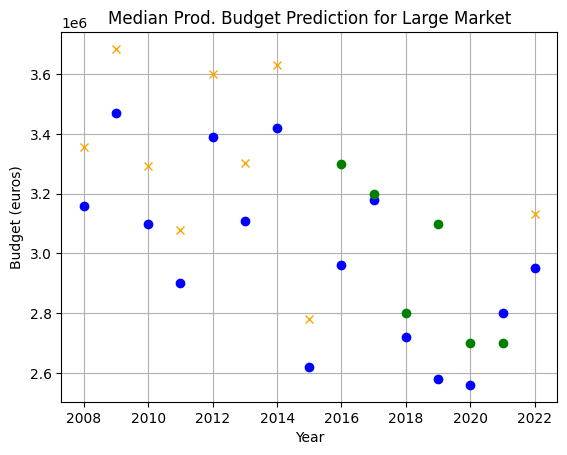

In [ ]:
# Historical data for Market L (2016-2021)
data_l = {
    'year': np.arange(2016, 2022),
    'budget_L': [3300000, 3200000, 2800000, 3100000, 2700000, 2700000]
}
df_l = pd.DataFrame(data_l)

# Define the years where we need predictions
years_to_predict = np.concatenate([np.arange(2003, 2016), np.array([2022])])

interpolator_france = interp1d(df_france['year'], df_france['budget_france'], kind='linear', fill_value="extrapolate")

# Predict the budgets for Product B using the interpolation function based on Product A
predicted_budgets_france = interpolator_france(years_to_predict)

# Extract the years and budgets for Product B where you have actual data
years_l = df_l['year'].values
budgets_l = df_l['budget_L'].values

# Create interpolation function for Product B
interpolator_l = interp1d(years_l, budgets_l, kind='linear', fill_value="extrapolate")

# Predict the budgets for Product B for years 2016-2021 (to validate)
predicted_budgets_l_actual = interpolator_l(years_l)


overlap_years = np.intersect1d(years_l, df_france['year'])
if len(overlap_years) > 0:
    ratio = budgets_l[np.in1d(years_l, overlap_years)] / df_france['budget_france'][np.in1d(df_france['year'], overlap_years)]
    # Calculate average ratio
    average_ratio = np.mean(ratio)
else:
    average_ratio = 1  # Default ratio if no overlap (though this should not happen with given data)

print(f"Average Ratio of Market L to Prench films variation: {average_ratio:.4f}")

# Adjust Product A's predictions by this ratio to estimate Product B's values
predicted_budgets_l = predicted_budgets_france * average_ratio

# Print the predicted budgets for Product B using Product A's adjusted values
print("Predicted Budgets for Market L (adjusted based on French Films' behavior):")
for year, budget in zip(years_to_predict, predicted_budgets_l):
    print(f"Year: {year}, Predicted Budget: {budget:.2f}")

# Plotting the results

# Filter data for years after 2007
df_france_filtered = df_france[df_france['year'] > 2007]
df_l_filtered = df_l[df_l['year'] > 2007]
years_to_predict_filtered = [year for year in years_to_predict if year > 2007]
predicted_budgets_l_filtered = [budget for year, budget in zip(years_to_predict, predicted_budgets_l) if year > 2007]


plt.plot(df_france_filtered['year'], df_france_filtered['budget_france'], 'o', label='French Films (CNC data)', color='blue')
plt.plot(years_to_predict_filtered, predicted_budgets_l_filtered, 'x', label='Mean Prod. Budget - L Market (Predicted)', color='orange')
plt.plot(df_l_filtered['year'], df_l_filtered['budget_L'], 'o', label='L Market (EAO data)', color='green')
#plt.legend()
plt.xlabel('Year')
plt.ylabel('Budget (euros)')
plt.title('Median Prod. Budget Prediction for Large Market')

plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

# Add a grid and display the plot
plt.grid(True)
plt.savefig('plot_market_L.pdf')
plt.show()

Average Ratio of Market L to Prench films variation: 0.3557
Predicted Budgets for Market L (adjusted based on French Films' behavior):
Year: 2003, Predicted Budget: 981775.00
Year: 2004, Predicted Budget: 1045803.81
Year: 2005, Predicted Budget: 1227218.75
Year: 2006, Predicted Budget: 1088489.68
Year: 2007, Predicted Budget: 889288.95
Year: 2008, Predicted Budget: 1124061.23
Year: 2009, Predicted Budget: 1234333.06
Year: 2010, Predicted Budget: 1102718.30
Year: 2011, Predicted Budget: 1031575.18
Year: 2012, Predicted Budget: 1205875.82
Year: 2013, Predicted Budget: 1106275.45
Year: 2014, Predicted Budget: 1216547.28
Year: 2015, Predicted Budget: 931974.82
Year: 2022, Predicted Budget: 1049360.96


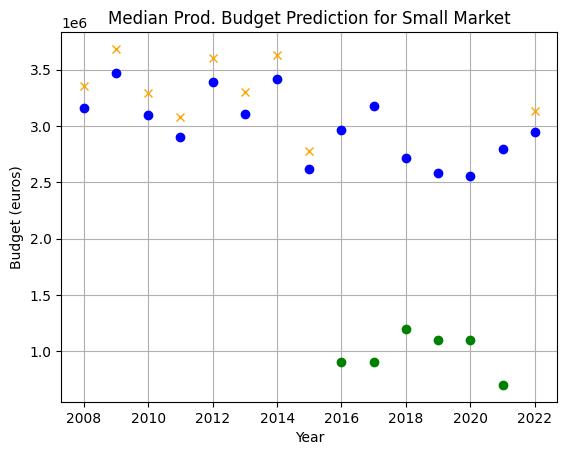

In [ ]:
# Historical data for Market S (2016-2021)
data_s = {
    'year': np.arange(2016, 2022),
    'budget_S': [900000,900000,1200000,1100000,1100000,700000]
}
df_s = pd.DataFrame(data_s)

# Define the years where we need predictions
years_to_predict = np.concatenate([np.arange(2003, 2016), np.array([2022])])

interpolator_france = interp1d(df_france['year'], df_france['budget_france'], kind='linear', fill_value="extrapolate")

# Predict the budgets for Product B using the interpolation function based on Product A
predicted_budgets_france = interpolator_france(years_to_predict)

# Extract the years and budgets for Product B where you have actual data
years_s = df_s['year'].values
budgets_s = df_s['budget_S'].values

# Create interpolation function for Product B
interpolator_s = interp1d(years_s, budgets_s, kind='linear', fill_value="extrapolate")

# Predict the budgets for Product B for years 2016-2021 (to validate)
predicted_budgets_s_actual = interpolator_s(years_s)


overlap_years = np.intersect1d(years_l, df_france['year'])
if len(overlap_years) > 0:
    ratio = budgets_s[np.in1d(years_s, overlap_years)] / df_france['budget_france'][np.in1d(df_france['year'], overlap_years)]
    # Calculate average ratio
    average_ratio = np.mean(ratio)
else:
    average_ratio = 1  # Default ratio if no overlap (though this should not happen with given data)

print(f"Average Ratio of Market L to Prench films variation: {average_ratio:.4f}")

# Adjust Product A's predictions by this ratio to estimate Product B's values
predicted_budgets_s = predicted_budgets_france * average_ratio

# Print the predicted budgets for Product B using Product A's adjusted values
print("Predicted Budgets for Market L (adjusted based on French Films' behavior):")
for year, budget in zip(years_to_predict, predicted_budgets_s):
    print(f"Year: {year}, Predicted Budget: {budget:.2f}")

# Plotting the results

# Filter data for years after 2007
df_france_filtered = df_france[df_france['year'] > 2007]
df_s_filtered = df_s[df_l['year'] > 2007]
years_to_predict_filtered = [year for year in years_to_predict if year > 2007]
predicted_budgets_s_filtered = [budget for year, budget in zip(years_to_predict, predicted_budgets_s) if year > 2007]


plt.plot(df_france_filtered['year'], df_france_filtered['budget_france'], 'o', label='French Films (CNC data)', color='blue')
plt.plot(years_to_predict_filtered, predicted_budgets_l_filtered, 'x', label='Mean Prod. Budget - S Market (Predicted)', color='orange')
plt.plot(df_s_filtered['year'], df_s_filtered['budget_S'], 'o', label='S Market (EAO data)', color='green')
#plt.legend()
plt.xlabel('Year')
plt.ylabel('Budget (euros)')
plt.title('Median Prod. Budget Prediction for Small Market')

plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

# Add a grid and display the plot
plt.grid(True)
plt.savefig('plot_market_S.pdf')
plt.show()# Historical data for Market S (2016-2021)

Average Ratio of Market M to Prench films variation: 0.5941
Predicted Budgets for Market M (adjusted based on French Films' behavior):
Year: 2003, Predicted Budget: 981775.00
Year: 2004, Predicted Budget: 1045803.81
Year: 2005, Predicted Budget: 1227218.75
Year: 2006, Predicted Budget: 1088489.68
Year: 2007, Predicted Budget: 889288.95
Year: 2008, Predicted Budget: 1124061.23
Year: 2009, Predicted Budget: 1234333.06
Year: 2010, Predicted Budget: 1102718.30
Year: 2011, Predicted Budget: 1031575.18
Year: 2012, Predicted Budget: 1205875.82
Year: 2013, Predicted Budget: 1106275.45
Year: 2014, Predicted Budget: 1216547.28
Year: 2015, Predicted Budget: 931974.82
Year: 2022, Predicted Budget: 1049360.96


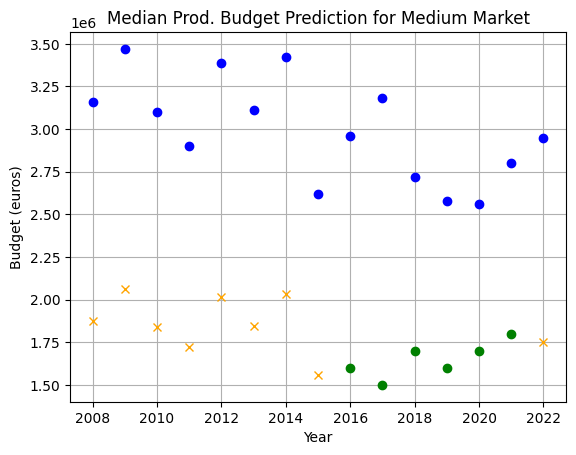

In [ ]:
# Historical data for Market M (2016-2021)
data_m = {
    'year': np.arange(2016, 2022),
    'budget_M': [1600000, 1500000,1700000,1600000,1700000,1800000]
}
df_m = pd.DataFrame(data_m)

# Define the years where we need predictions
years_to_predict = np.concatenate([np.arange(2003, 2016), np.array([2022])])

interpolator_france = interp1d(df_france['year'], df_france['budget_france'], kind='linear', fill_value="extrapolate")

# Predict the budgets for Product B using the interpolation function based on Product A
predicted_budgets_france = interpolator_france(years_to_predict)

# Extract the years and budgets for Product B where you have actual data
years_m = df_m['year'].values
budgets_m = df_m['budget_M'].values

# Create interpolation function for Product B
interpolator_m = interp1d(years_m, budgets_m, kind='linear', fill_value="extrapolate")

# Predict the budgets for Product B for years 2016-2021 (to validate)
predicted_budgets_m_actual = interpolator_m(years_m)


overlap_years = np.intersect1d(years_m, df_france['year'])
if len(overlap_years) > 0:
    ratio = budgets_m[np.in1d(years_m, overlap_years)] / df_france['budget_france'][np.in1d(df_france['year'], overlap_years)]
    # Calculate average ratio
    average_ratio = np.mean(ratio)
else:
    average_ratio = 1  # Default ratio if no overlap (though this should not happen with given data)

print(f"Average Ratio of Market M to Prench films variation: {average_ratio:.4f}")

# Adjust Product A's predictions by this ratio to estimate Product B's values
predicted_budgets_m = predicted_budgets_france * average_ratio

# Print the predicted budgets for Product B using Product A's adjusted values
print("Predicted Budgets for Market M (adjusted based on French Films' behavior):")
for year, budget in zip(years_to_predict, predicted_budgets_s):
    print(f"Year: {year}, Predicted Budget: {budget:.2f}")

# Plotting the results

# Filter data for years after 2007
df_france_filtered = df_france[df_france['year'] > 2007]
df_m_filtered = df_m[df_l['year'] > 2007]
years_to_predict_filtered = [year for year in years_to_predict if year > 2007]
predicted_budgets_m_filtered = [budget for year, budget in zip(years_to_predict, predicted_budgets_m) if year > 2007]


plt.plot(df_france_filtered['year'], df_france_filtered['budget_france'], 'o', label='French Films (CNC data)', color='blue')
plt.plot(years_to_predict_filtered, predicted_budgets_m_filtered, 'x', label='Mean Prod. Budget - M Market (Predicted)', color='orange')
plt.plot(df_m_filtered['year'], df_m_filtered['budget_M'], 'o', label='M Market (EAO data)', color='green')
#plt.legend()
plt.xlabel('Year')
plt.ylabel('Budget (euros)')
plt.title('Median Prod. Budget Prediction for Medium Market')

plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

# Add a grid and display the plot
plt.grid(True)
plt.savefig('plot_market_M.pdf')
plt.show()# Historical data for Market M (2016-2021)

In [ ]:
predicted_s = pd.DataFrame({
    'year': years_to_predict,
    'predicted_budget_S': predicted_budgets_s
})


predicted_m = pd.DataFrame({
    'year': years_to_predict,
    'predicted_budget_M': predicted_budgets_m
})


predicted_l = pd.DataFrame({
    'year': years_to_predict,
    'predicted_budget_L': predicted_budgets_l
})


all_years = np.arange(2003, 2023)
df_all_years = pd.DataFrame({'year': all_years})


# Merge historical and predicted budgets into the all-years DataFrame
df_all_years = df_all_years.merge(df_s, on='year', how='left')  # Add historical data
df_all_years = df_all_years.merge(predicted_s, on='year', how='left')  # Add predicted data

# Fill the 'budget_B' column with the historical value where available, otherwise use the predicted value
df_all_years['budget_S'] = df_all_years['budget_S'].fillna(df_all_years['predicted_budget_S'])

# Drop the predicted_budget_B column as it is no longer needed
df_all_years = df_all_years.drop(columns='predicted_budget_S')



df_all_years = df_all_years.merge(df_m, on='year', how='left')  # Add historical data
df_all_years = df_all_years.merge(predicted_m, on='year', how='left')  # Add predicted data

# Fill the 'budget_B' column with the historical value where available, otherwise use the predicted value
df_all_years['budget_M'] = df_all_years['budget_M'].fillna(df_all_years['predicted_budget_M'])

# Drop the predicted_budget_B column as it is no longer needed
df_all_years = df_all_years.drop(columns='predicted_budget_M')


df_all_years = df_all_years.merge(df_l, on='year', how='left')  # Add historical data
df_all_years = df_all_years.merge(predicted_l, on='year', how='left')  # Add predicted data

# Fill the 'budget_B' column with the historical value where available, otherwise use the predicted value
df_all_years['budget_L'] = df_all_years['budget_L'].fillna(df_all_years['predicted_budget_L'])

# Drop the predicted_budget_B column as it is no longer needed
df_all_years = df_all_years.drop(columns='predicted_budget_L')

In [ ]:
df_all_years

,year,budget_S,budget_M,budget_L
0,2003,9.817750e+05,1.639584e+06,2.930701e+06
1,2004,1.045804e+06,1.746514e+06,3.121834e+06
2,2005,1.227219e+06,2.049480e+06,3.663376e+06
3,2006,1.088490e+06,1.817800e+06,3.249256e+06
4,2007,8.892890e+05,1.485131e+06,2.654621e+06
5,2008,1.124061e+06,1.877205e+06,3.355440e+06
6,2009,1.234333e+06,2.061361e+06,3.684613e+06
7,2010,1.102718e+06,1.841562e+06,3.291730e+06
8,2011,1.031575e+06,1.722751e+06,3.079360e+06
9,2012,1.205876e+06,2.013837e+06,3.599666e+06


In [ ]:
tickets_reversed = tickets[::-1].reset_index(drop=True)
tickets_reversed

,year,HICP,average_ticket_s,average_ticket_m,average_ticket_l,average budget_s,average budget_m,average budget_l
0,2003,2.1,5.428585,7.813650,4.996932,NaN,NaN,NaN
1,2004,2.1,5.542585,7.977737,5.101867,NaN,NaN,NaN
2,2005,2.2,5.658979,8.145269,5.209007,NaN,NaN,NaN
3,2006,2.2,5.783477,8.324465,5.323605,NaN,NaN,NaN
4,2007,2.3,5.910713,8.507604,5.440724,NaN,NaN,NaN
5,2008,3.7,6.046660,8.703279,5.565861,NaN,NaN,NaN
6,2009,1.0,6.270386,9.025300,5.771798,NaN,NaN,NaN
7,2010,2.1,6.333090,9.115553,5.829516,NaN,NaN,NaN
8,2011,3.1,6.466085,9.306979,5.951935,NaN,NaN,NaN
9,2012,2.6,6.666534,9.595496,6.136445,NaN,NaN,NaN


In [ ]:
tickets_reversed['average budget_s']= df_all_years['budget_S']
tickets_reversed['average budget_m']= df_all_years['budget_M']
tickets_reversed['average budget_l']= df_all_years['budget_L']

### 5.3 - Calculate and Export Thresholds (Our Method)

In [ ]:
# Rename the DataFrame
inflation=tickets_reversed

In [ ]:
# Using our conditions to caclulate each threshold

for count in range(0,20):
  micro_threshold_s= ((inflation.loc[count, 'average budget_s']/4) / inflation.loc[count, 'average_ticket_s'])
  micro_threshold_m= ((inflation.loc[count, 'average budget_m']/4) / inflation.loc[count, 'average_ticket_m'])
  micro_threshold_l= ((inflation.loc[count, 'average budget_l']/4) / inflation.loc[count, 'average_ticket_l'])
  inflation.loc[count, 'micro_threshold_s'] = micro_threshold_s
  inflation.loc[count, 'micro_threshold_m'] = micro_threshold_m
  inflation.loc[count, 'micro_threshold_l'] = micro_threshold_l

  low_threshold_s= ((inflation.loc[count, 'average budget_s']/2) / inflation.loc[count, 'average_ticket_s'])
  low_threshold_m= ((inflation.loc[count, 'average budget_m']/2) / inflation.loc[count, 'average_ticket_m'])
  low_threshold_l= ((inflation.loc[count, 'average budget_l']/2) / inflation.loc[count, 'average_ticket_l'])
  inflation.loc[count, 'low_threshold_s'] = low_threshold_s
  inflation.loc[count, 'low_threshold_m'] = low_threshold_m
  inflation.loc[count, 'low_threshold_l'] = low_threshold_l

  medium_threshold_s= (inflation.loc[count, 'average budget_s'] / inflation.loc[count, 'average_ticket_s'])
  medium_threshold_m= (inflation.loc[count, 'average budget_m'] / inflation.loc[count, 'average_ticket_m'])
  medium_threshold_l= (inflation.loc[count, 'average budget_l'] / inflation.loc[count, 'average_ticket_l'])
  inflation.loc[count, 'medium_threshold_s'] = medium_threshold_s
  inflation.loc[count, 'medium_threshold_m'] = medium_threshold_m
  inflation.loc[count, 'medium_threshold_l'] = medium_threshold_l

  high_threshold_s= ((inflation.loc[count, 'average budget_s']*1.5) / inflation.loc[count, 'average_ticket_s'])
  high_threshold_m= ((inflation.loc[count, 'average budget_m']*1.5) / inflation.loc[count, 'average_ticket_m'])
  high_threshold_l= ((inflation.loc[count, 'average budget_l']*1.5) / inflation.loc[count, 'average_ticket_l'])
  inflation.loc[count, 'high_threshold_s'] = high_threshold_s
  inflation.loc[count, 'high_threshold_m'] = high_threshold_m
  inflation.loc[count, 'high_threshold_l'] = high_threshold_l

In [ ]:
classification=inflation

In [ ]:
classification.to_excel(path+"classification"+date+".xlsx", index=False)

### 5.4 - Calculate and Export Thresholds (EAO 2023 Report Method)

In [ ]:
# Using the thresholds published in the EAO 2023 Report

classification_2022report = pd.DataFrame()

micro_threshold_ss= 20000
micro_threshold_s= 35000
micro_threshold_sm= 100000
micro_threshold_m = 150000
micro_threshold_ml= 250000
micro_threshold_l = 350000

low_threshold_ss= 50000
low_threshold_s= 130000
low_threshold_sm= 200000
low_threshold_m = 400000
low_threshold_ml= 800000
low_threshold_l = 1500000

medium_threshold_ss= 100000
medium_threshold_s= 270000
medium_threshold_sm= 500000
medium_threshold_m = 950000
medium_threshold_ml= 1800000
medium_threshold_l = 3000000

In [ ]:
years = list(range(2002, 2022))

# Create the 'year' column
classification_2022report['year'] = years

# Add a column 'micro_threshold_ss' with the same value 1 for all years
classification_2022report['micro_threshold_ss'] = micro_threshold_ss
classification_2022report['micro_threshold_s'] = micro_threshold_s
classification_2022report['micro_threshold_sm'] = micro_threshold_sm
classification_2022report['micro_threshold_m'] = micro_threshold_m
classification_2022report['micro_threshold_ml'] = micro_threshold_ml
classification_2022report['micro_threshold_l'] = micro_threshold_l

classification_2022report['low_threshold_ss'] = low_threshold_ss
classification_2022report['low_threshold_s'] = low_threshold_s
classification_2022report['low_threshold_sm'] = low_threshold_sm
classification_2022report['low_threshold_m'] = low_threshold_m
classification_2022report['low_threshold_ml'] = low_threshold_ml
classification_2022report['low_threshold_l'] = low_threshold_l

classification_2022report['medium_threshold_ss'] = medium_threshold_ss
classification_2022report['medium_threshold_s'] = medium_threshold_s
classification_2022report['medium_threshold_sm'] = medium_threshold_sm
classification_2022report['medium_threshold_m'] = medium_threshold_m
classification_2022report['medium_threshold_ml'] = medium_threshold_ml
classification_2022report['medium_threshold_l'] = medium_threshold_l

In [ ]:
classification_2022report.to_excel(path+"classification_2023report"+date+".xlsx", index=False)

## 6 - Calculate Ratio of Success

This section calculates how many films are classified as successful each year (both our method and the one from the EAO 2023 Report) and their ration compared with the annual production

### 6.1 - Calculate Ratio of Success

In [ ]:
# Import data

path = '/content/drive/MyDrive/Exports Cineuropa/'
df = pd.read_excel(path+'master0402024.xlsx') # Baseline
df2022 = pd.read_excel(path+'master_2022report_24072024.xlsx') #Report 2023
classification_2022report = pd.read_excel(path+'classification_2022report_24072024.xlsx') # Robustness checks
classification = pd.read_excel(path+'classification_24072024.xlsx')

In [ ]:
# Import the full database retreived from LUMIERE (before exlcuing the non-reviewed films)
obs = pd.read_excel(path+'moviesOBS'+date+'.xlsx')
obs

,ID,title,year,country,director,admissions
0,19685,Poppitz,2002,AT,Harald Sicheritz,456908
1,19722,Im toten Winkel - Hitlers Sekretärin,2002,AT,"André Heller, Othmar Schmiderer",92032
2,19901,Blue Moon,2002,AT,Andrea Maria Dusl,89033
3,27189,Am anderen Ende der Brücke,2002,"AT, CN",Mei Hu,29099
4,18917,Meine Schwester Maria,2002,"AT, DE, CH",Maximilian Schell,15559
...,...,...,...,...,...,...
34719,253754,Cirku Fluturues,2019,XK,Fatos Berisha,154
34720,237335,Zana,2019,"XK, AL, US, GE",Antoneta Kastrati,32
34721,162882,La colline où rugissent les lionnes,2021,"FR, XK, US",Luàna Bajrami,11289
34722,460547,"As I Was Looking Above, I Could See Myself Und...",2022,XK,Ilir Hasanaj,50


In [ ]:
# Prepare data for further analysis

df_no_na = df.dropna(subset=['markets', 'admissions_final', 'Predicted Sentiment Cineuropa']).reset_index(drop=True)
df_no_na_2022 = new_df_2023.dropna(subset=['markets', 'admissions_final', 'Predicted Sentiment Cineuropa']).reset_index(drop=True)


classification.rename(columns ={'Year': 'year'}, inplace=True)
classification_2022report.rename(columns={'Year': 'year'}, inplace=True)

In [ ]:
df_no_na = df.dropna(subset=['markets', 'admissions_final', 'Predicted Sentiment Cineuropa']).reset_index(drop=True)

In [ ]:
df_no_na

,Unnamed: 0.1,Unnamed: 0,title,original_title,director,year,country,cineuropa_review_author_x,cineuropa_review_date_x,rottentomatoes_tomatometer_score,...,festivals,imdb_score,festivals_rank,festival_values,markets,French productions,Distribution in France,FR Penetration,industry_average,industry_low
0,0,0,The Innocent,linnocent,Louis Garrel,2022,France,Louis Garrel,11/10/2022,NaN,...,"['César Awards, France', 'Namur International ...",6.7,False,1,L,Majority,Yes,includes FR,0.550000,0.550000
1,1,1,Venus,venus,Jaume Balagueró,2022,Spain,Jaume Balagueró,11/10/2022,NaN,...,"['Fotogramas de Plata', 'Warsaw International ...",5.5,True,2,L,No,No,no FR,NaN,NaN
2,2,2,Eagles from Țaga,vulturii din taga,"Iulian Manuel Ghervas, Adina Popescu",2022,"Romania, Slovakia","Iulian Manuel Ghervas, Adina Popescu",10/10/2022,NaN,...,"['Gopo Awards, Romania']",8.1,False,1,M,No,No,no FR,NaN,NaN
3,3,3,Amazing Elisa,asombrosa elisa,Sadrac González-Perellón,2022,Spain,Sadrac González-Perellón,07/10/2022,NaN,...,['Sitges - Catalonian International Film Festi...,4.4,False,1,L,No,No,no FR,NaN,NaN
4,4,4,Roald Dahl's Matilda the Musical,roald dahl s matilda the musical,Matthew Warchus,2022,"United Kingdom, United States",Matthew Warchus,07/10/2022,100.0,...,"['BAFTA Awards', 'Casting Society of America, ...",7.0,False,1,L,No,No,no FR,0.700000,0.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4053,4362,4362,Versailles,versailles,Pierre Schoeller,2008,France,Pierre Schoeller,06/07/2008,NaN,...,"['Bratislava International Film Festival', 'Ca...",6.7,False,1,L,Majority,Yes,includes FR,0.500000,0.500000
4054,4363,4363,Timecrimes,los cronocrimenes,Nacho Vigalondo,2007,Spain,Nacho Vigalondo,26/06/2008,90.0,...,['Sitges - Catalonian International Film Festi...,7.1,False,1,L,No,No,no FR,0.476974,0.375000
4055,4364,4364,Tricks,sztuczki,Andrzej Jakimowski,2007,Poland,Andrzej Jakimowski,12/06/2008,NaN,...,"['Angers European First Film Festival', 'Brati...",7.0,True,2,L,No,Yes,includes FR,0.523810,0.523810
4056,4365,4365,Frontier of Dawn,la frontiere de laube,Philippe Garrel,2008,"France, Italy",Philippe Garrel,22/05/2008,50.0,...,['Cannes Film Festival'],6.4,False,1,L,Majority,Yes,includes FR,0.710526,0.421053


In [ ]:
classification=inflation

2023 report classification method

In [ ]:
def classify_films2022(df, classification):
    # Define the threshold names for each market size
    thresholds = {
        'SS': ['micro_threshold_ss', 'low_threshold_ss', 'medium_threshold_ss'],
        'S': ['micro_threshold_s', 'low_threshold_s', 'medium_threshold_s'],
	      'SM': ['micro_threshold_sm', 'low_threshold_sm', 'medium_threshold_sm'],
        'M': ['micro_threshold_m', 'low_threshold_m', 'medium_threshold_m'],
	      'ML': ['micro_threshold_ml', 'low_threshold_ml', 'medium_threshold_ml'],
	      'L': ['micro_threshold_l', 'low_threshold_l', 'medium_threshold_l'],
    }

    # Check if required columns exist in both DataFrames
    required_columns_df = ['markets', 'year', 'admissions_final']
    required_columns_class = ['year'] + [col for sublist in thresholds.values() for col in sublist]

    for col in required_columns_df:
        if col not in df.columns:
            raise ValueError(f"Column '{col}' not found in input DataFrame 'df'")

    for col in required_columns_class:
        if col not in classification.columns:
            raise ValueError(f"Column '{col}' not found in classification DataFrame")

    # Create a new column for the classification
    df['classification'] = np.nan

    for index, row in df.iterrows():
        market = row['markets']
        year = row['year']
        admission = row['admissions_final'] # replace admissions_final with admissions_weighted //
                                               # admissions_new_fest factors in festivals

        # Filter the classification DataFrame for the correct year and thresholds
        class_row = classification[classification['year'] == year]

        if not class_row.empty:
            # Get the thresholds for the specific market size
            market_thresholds = thresholds[market]

            # Compare with each threshold
            for threshold in market_thresholds:
                if admission <= class_row.iloc[0][threshold]:
                    df.at[index, 'classification'] = threshold
                    break
            else:
                # If no break occurred, it means admission exceeded all thresholds
                df.at[index, 'classification'] = 'high_threshold'+"_"+market.lower()
    return df

In [ ]:
categorized_df_2022 = classify_films2022(df_no_na_2022, classification_2022report)

<ipython-input-112-dfea32752155>:43: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'micro_threshold_m' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.at[index, 'classification'] = threshold


In [ ]:
categorized_df_2022['classification'].value_counts()

,count
classification,
micro_threshold_ml,870
micro_threshold_s,817
micro_threshold_l,674
low_threshold_l,205
low_threshold_s,197
micro_threshold_ss,195
low_threshold_ml,136
micro_threshold_m,102
high_threshold_s,89


Our method

In [ ]:
def classify_films(df, classification):
    # Define the threshold names for each market size
    thresholds = {
        'S': ['micro_threshold_s', 'low_threshold_s', 'medium_threshold_s', 'high_threshold_s'],
        'M': ['micro_threshold_m', 'low_threshold_m', 'medium_threshold_m', 'high_threshold_m'],
        'L': ['micro_threshold_l', 'low_threshold_l', 'medium_threshold_l', 'high_threshold_l']
    }

    # Check if required columns exist in both DataFrames
    required_columns_df = ['markets', 'year', 'admissions_final']
    required_columns_class = ['year'] + [col for sublist in thresholds.values() for col in sublist]

    for col in required_columns_df:
        if col not in df.columns:
            raise ValueError(f"Column '{col}' not found in input DataFrame 'df'")

    for col in required_columns_class:
        if col not in classification.columns:
            raise ValueError(f"Column '{col}' not found in classification DataFrame")

    # Create a new column for the classification
    df['classification'] = np.nan

    for index, row in df.iterrows():
        market = row['markets']
        year = row['year']
        admission = row['admissions_final'] # replace admissions_final with admissions_weighted //
                                               # admissions_new_fest factors in festivals

        # Filter the classification DataFrame for the correct year and thresholds
        class_row = classification[classification['year'] == year]

        if not class_row.empty:
            # Get the thresholds for the specific market size
            market_thresholds = thresholds[market]

            # Compare with each threshold
            for threshold in market_thresholds:
                if admission <= class_row.iloc[0][threshold]:
                    df.at[index, 'classification'] = threshold
                    break
            else:
                # If no break occurred, it means admission exceeded all thresholds
                df.at[index, 'classification'] = 'super_high_threshold'+"_"+market.lower()
    return df

In [ ]:
categorized_df = classify_films(df_no_na, classification)

<ipython-input-116-5d3ac1f9515f>:44: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'super_high_threshold_l' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.at[index, 'classification'] = 'super_high_threshold'+"_"+market.lower()


In [ ]:
values_sample = []
films=[]
total_films=[]

for year in range(2008, 2023):  # Loop from 2008 to 2022
    s = categorized_df.loc[categorized_df['year'] == year].shape[0]
    filtered_df = categorized_df[
        (categorized_df['year'] == year) &
        ((categorized_df['classification'] == 'micro_threshold_l') |
         (categorized_df['classification'] == 'micro_threshold_s') |
         (categorized_df['classification'] == 'micro_threshold_m') |
         (categorized_df['classification'] == 'low_threshold_l') |
         (categorized_df['classification'] == 'low_threshold_s') |
         (categorized_df['classification'] == 'low_threshold_m'))
    ]

    n=filtered_df.shape[0]
    # Append the value to the list
    print(f"Year: {year}, Count: {n}, Sum of Films: {s}, percentage of 0-sucess films {n/s:.2f}, percentage of 1-success films {1-n/s:.2f}")
    value=1-n/s
    films.append(s-n)
    total_films.append(s)

    # Append the value to the list
    values_sample.append(value)
    #years_sample.append(filtered_df.iloc[0]['sum_films'])  # Append the year to the list
mean_value_sample = sum(values_sample) / len(values_sample) if values_sample else 0  # Handle empty list
print(f"Mean value: {mean_value_sample:.2f}")
print(f"N. of films in '1' class: {films}")
print(f"N.of films in sample: {total_films}")



Year: 2008, Count: 39, Sum of Films: 57, percentage of 0-sucess films 0.68, percentage of 1-success films 0.32
Year: 2009, Count: 63, Sum of Films: 102, percentage of 0-sucess films 0.62, percentage of 1-success films 0.38
Year: 2010, Count: 53, Sum of Films: 91, percentage of 0-sucess films 0.58, percentage of 1-success films 0.42
Year: 2011, Count: 56, Sum of Films: 95, percentage of 0-sucess films 0.59, percentage of 1-success films 0.41
Year: 2012, Count: 90, Sum of Films: 137, percentage of 0-sucess films 0.66, percentage of 1-success films 0.34
Year: 2013, Count: 137, Sum of Films: 192, percentage of 0-sucess films 0.71, percentage of 1-success films 0.29
Year: 2014, Count: 164, Sum of Films: 221, percentage of 0-sucess films 0.74, percentage of 1-success films 0.26
Year: 2015, Count: 199, Sum of Films: 272, percentage of 0-sucess films 0.73, percentage of 1-success films 0.27
Year: 2016, Count: 243, Sum of Films: 322, percentage of 0-sucess films 0.75, percentage of 1-success fi

In [ ]:
values_sample2022 = []
films2022=[]
total_films2022=[]


for year in range(2008, 2022):  # Loop from 2008 to 2022
    s = categorized_df_2022.loc[categorized_df_2022['year'] == year].shape[0]
    filtered_df = categorized_df_2022[
        (categorized_df_2022['year'] == year) &
        ((categorized_df_2022['classification'] == 'micro_threshold_l') |
         (categorized_df_2022['classification'] == 'micro_threshold_s') |
         (categorized_df_2022['classification'] == 'micro_threshold_m') |
          (categorized_df_2022['classification'] == 'micro_threshold_ml') |
         (categorized_df_2022['classification'] == 'micro_threshold_ss') |
         (categorized_df_2022['classification'] == 'micro_threshold_sm') |
         (categorized_df_2022['classification'] == 'low_threshold_ml') |
         (categorized_df_2022['classification'] == 'low_threshold_s') |
         (categorized_df_2022['classification'] == 'low_threshold_m') |
          (categorized_df_2022['classification'] == 'low_threshold_l') |
         (categorized_df_2022['classification'] == 'low_threshold_ss') |
         (categorized_df_2022['classification'] == 'low_threshold_sm'))
    ]

    n=filtered_df.shape[0]
    # Append the value to the list
    print(f"Year: {year}, Count: {n}, Sum of Films: {s}, percentage of 0-sucess films {n/s:.2f}, percentage of 1-success films {1-n/s:.2f}")
    value=1-n/s
    films2022.append(s-n)
    total_films2022.append(s)

    # Append the value to the list
    values_sample2022.append(value)
    #years_sample.append(filtered_df.iloc[0]['sum_films'])  # Append the year to the list
mean_value_sample2022 = sum(values_sample2022) / len(values_sample2022) if values_sample2022 else 0  # Handle empty list
print(f"Mean value: {mean_value_sample2022:.2f}")
print(f"N. of films in '1' class: {films2022}")
print(f"N.of films in sample: {total_films2022}")

Year: 2008, Count: 45, Sum of Films: 57, percentage of 0-sucess films 0.79, percentage of 1-success films 0.21
Year: 2009, Count: 79, Sum of Films: 102, percentage of 0-sucess films 0.77, percentage of 1-success films 0.23
Year: 2010, Count: 77, Sum of Films: 91, percentage of 0-sucess films 0.85, percentage of 1-success films 0.15
Year: 2011, Count: 77, Sum of Films: 95, percentage of 0-sucess films 0.81, percentage of 1-success films 0.19
Year: 2012, Count: 112, Sum of Films: 137, percentage of 0-sucess films 0.82, percentage of 1-success films 0.18
Year: 2013, Count: 164, Sum of Films: 192, percentage of 0-sucess films 0.85, percentage of 1-success films 0.15
Year: 2014, Count: 198, Sum of Films: 221, percentage of 0-sucess films 0.90, percentage of 1-success films 0.10
Year: 2015, Count: 242, Sum of Films: 272, percentage of 0-sucess films 0.89, percentage of 1-success films 0.11
Year: 2016, Count: 289, Sum of Films: 322, percentage of 0-sucess films 0.90, percentage of 1-success f

In [ ]:
# Graph on the films in our sample
# The number of films is retreived from the full database calculated in the next step. Includes only films with theatrical release.

yearly_production = [1062, 1160, 1218, 1257, 1330, 1422, 1561, 1542, 1548, 1673, 1751, 1768, 1467, 1658, 1730]
years = list(range(2008, 2022))

# Calculate rolling averages with a window size of 3 (can be adjusted)
window_size = 3
rolling_avg_values = pd.Series(values_sample).rolling(window=window_size, min_periods=1).mean().tolist()
rolling_avg_years = pd.Series(yearly_production).rolling(window=window_size, min_periods=1).mean().tolist()
rolling_avg_values2022 = pd.Series(values_sample2022).rolling(window=window_size, min_periods=1).mean().tolist()

# Create Plotly figures

colors = px.colors.sequential.Burgyl
color_for_bars = colors[1]  # Light color for bars
color_for_lines = colors[6]  # Darker color for lines

fig = go.Figure()


# Add trace for rolling average of total number of films
fig.add_trace(go.Bar(
    x=years,
    y=rolling_avg_years,
    name=f'Total N. of Films',
    marker_color= color_for_bars,
    yaxis='y1'
))

# Add trace for rolling average of percentage of 1-success films
fig.add_trace(go.Scatter(
    x=years,
    y=rolling_avg_values,
    mode='lines',
    name=f'Ratio of Most Successful Films',
    line=dict(color=color_for_lines),
    yaxis='y2'
))

# Add trace for rolling average of percentage of 1-success films
fig.add_trace(go.Scatter(
    x=years,
    y=rolling_avg_values2022,
    mode='lines',
    name=f'Ratio of Most Successful Films - 2023 Report',
    line=dict(color=color_for_lines, dash='dash'),
    yaxis='y2'
))


# Update layout with secondary y-axis
fig.update_layout(
    title='Total N. of Films and Ratio of Most Successful Films by Year',
    xaxis_title='Year',
    yaxis_title='Number of Films',
    yaxis=dict(
        title='Total N. of Films',
        titlefont=dict(color='black', size=14),
        tickfont=dict(color='black', size=14),
        linewidth=1,
        linecolor='black'),

    yaxis2=dict(
        title='Ratio of Most Successful Films',
        titlefont=dict(color='black', size=14),
        tickfont=dict(color='black', size =14),
        overlaying='y',
        side='right',
        linewidth=1,
        linecolor='black'
    ),

    plot_bgcolor='white',  # Remove background color
    paper_bgcolor='white', # Remove outer background color
    legend=dict(x=0, y=0, traceorder='normal', font=dict(size=12)),
    xaxis=dict(
    zerolinecolor='lightgrey',
    titlefont=dict(color='black', size=14),
        tickfont=dict(color='black', size =14),
     gridcolor='white',
    linewidth=1,
        linecolor='black'
    ),
    width=800,  # Set the width of the plot
    height=500  # Set the height of the plot

)

# Save the figure to a file
fig.write_image(path+"plotly_graph_sample.pdf")

# Show plot
fig.show()

Repeat the process using all films released between 2003 and 2022 to verify the previous findings

In [ ]:
#Define the new market clusters according to the 2023 report (six classes)

country_list_ss = ["EE", "HR", "LT", "LV", "SI", "SK", "BG"]

country_list_s = ["AT", "BE", "CH", "PT", "DK", "GR", "FI", "HU", "RO", "NO", "SE", "CZ", "UA"]

country_list_sm = ["NL"]

country_list_m = ["PL", "TR"]

country_list_ml = ["DE", "IT", "ES"]

country_list_l = ["FR", "GB", "IE"]

In [ ]:
obs2022=obs.copy()
obs2022['markets']=np.nan
obs2022

,ID,title,year,country,director,admissions,markets
0,19685,Poppitz,2002,AT,Harald Sicheritz,456908,NaN
1,19722,Im toten Winkel - Hitlers Sekretärin,2002,AT,"André Heller, Othmar Schmiderer",92032,NaN
2,19901,Blue Moon,2002,AT,Andrea Maria Dusl,89033,NaN
3,27189,Am anderen Ende der Brücke,2002,"AT, CN",Mei Hu,29099,NaN
4,18917,Meine Schwester Maria,2002,"AT, DE, CH",Maximilian Schell,15559,NaN
...,...,...,...,...,...,...,...
34719,253754,Cirku Fluturues,2019,XK,Fatos Berisha,154,NaN
34720,237335,Zana,2019,"XK, AL, US, GE",Antoneta Kastrati,32,NaN
34721,162882,La colline où rugissent les lionnes,2021,"FR, XK, US",Luàna Bajrami,11289,NaN
34722,460547,"As I Was Looking Above, I Could See Myself Und...",2022,XK,Ilir Hasanaj,50,NaN


In [ ]:
def check_first_country(value):
    first_country = str(value).split(',')[0].strip()  # Get the first country and strip any whitespace

    if first_country in country_list_ss:
        return 'SS'
    elif first_country in country_list_s:
        return 'S'
    elif first_country in country_list_sm:
        return 'SM'
    elif first_country in country_list_m:
        return 'M'
    elif first_country in country_list_ml:
        return 'ML'
    elif first_country in country_list_l:
        return 'L'
    else:
        # Fallback to the value in 'markets' if the country doesn't match any list
        return obs2022['markets'].loc[obs2022['country'] == value].values[0] if value in df['country'].values else np.nan

# Apply the combined function to the 'country' column
obs2022['markets'] = obs2022['country'].apply(check_first_country)


In [ ]:
obs2022["markets"].value_counts()

,count
markets,
S,9743
ML,9025
L,6474
M,2817
SS,1887
SM,1195


In [ ]:
obs2022_no_na=obs2022.dropna(subset=['markets'])
obs2022_no_na= obs2022_no_na.rename(columns={'admissions': 'admissions_final'})

In [ ]:
obs_new = obs
obs_new['markets']=np.nan

In [ ]:
country_list_s = ["CY", "EE", "FI", "GR", "HR", "IS", "LT", "LU", "LV", "BA", "GE", "ME", "MK", "MT", "SI", "SK", "BG"]
country_list_m = ["AT", "BE", "CH", "PT", "DK", "HU", "IE", "NL", "RO", "NO", "SE", "CZ", "UA"]
country_list_l = ["DE", "FR", "IT", "ES", "GB", "PL"]

In [ ]:
def check_first_country(value):
    first_country = str(value).split(',')[0].strip()  # Get the first country and strip any whitespace

    if first_country in country_list_s:
        return 'S'
    elif first_country in country_list_m:
        return 'M'
    elif first_country in country_list_l:
        return 'L'
    else:
        # Fallback to the existing value in 'markets' if no match
        return obs_new['markets'].loc[obs_new['country'] == value].values[0] if value in obs_new['country'].values else np.nan

# Apply the combined function to the 'country' column
obs_new['markets'] = obs_new['country'].apply(check_first_country)


In [ ]:
obs_new['markets'].value_counts()

,count
markets,
L,16094
M,10359
S,3124


In [ ]:
obs_no_na = obs_new.dropna(subset=['markets'])

In [ ]:
obs_no_na = obs_no_na.rename(columns={'admissions': 'admissions_final'})

In [ ]:
obs_no_na

,ID,title,year,country,director,admissions_final,markets
0,19685,Poppitz,2002,AT,Harald Sicheritz,456908,M
1,19722,Im toten Winkel - Hitlers Sekretärin,2002,AT,"André Heller, Othmar Schmiderer",92032,M
2,19901,Blue Moon,2002,AT,Andrea Maria Dusl,89033,M
3,27189,Am anderen Ende der Brücke,2002,"AT, CN",Mei Hu,29099,M
4,18917,Meine Schwester Maria,2002,"AT, DE, CH",Maximilian Schell,15559,M
...,...,...,...,...,...,...,...
34711,441390,Batko,2023,UA,Aleksandr Kobzar,247,M
34712,449624,Myrnyi-21,2023,UA,Akhtem Seitablaev,100,M
34713,460320,La Palisiada,2023,UA,Philip Sotnychenko,66,M
34714,455478,Cherubim,2023,UA,Evgen Matvienko,40,M


In [ ]:
obs2022_no_na.head(30)

,ID,title,year,country,director,admissions_final,markets
0,19685,Poppitz,2002,AT,Harald Sicheritz,456908,S
1,19722,Im toten Winkel - Hitlers Sekretärin,2002,AT,"André Heller, Othmar Schmiderer",92032,S
2,19901,Blue Moon,2002,AT,Andrea Maria Dusl,89033,S
3,27189,Am anderen Ende der Brücke,2002,"AT, CN",Mei Hu,29099,S
4,18917,Meine Schwester Maria,2002,"AT, DE, CH",Maximilian Schell,15559,S
5,20923,Bellaria - So lange wir leben!,2002,"DE, AT",Douglas Wolfsperger,15246,ML
6,19742,Gebürtig,2002,"AT, DE, PL","Robert Schindel, Lukas Stepanik",12104,S
7,20760,Zur Lage: Österreich in sechs Kapiteln,2002,AT,"Barbara Albert, Michael Glawogger, Ulrich Seid...",11683,S
8,20763,Vollgas,2002,AT,Sabine Derflinger,11496,S
9,20765,Meine Schwester das Biest,2002,"AT, DE",Reinhard Schwabenitzky,11237,S


In [ ]:
categorized_df_2022 = classify_films2022(obs2022_no_na, classification_2022report)

<ipython-input-112-dfea32752155>:47: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'high_threshold_s' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



In [ ]:
categorized_df_obs = classify_films(obs_no_na, classification)

<ipython-input-116-5d3ac1f9515f>:44: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'super_high_threshold_m' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



In [ ]:
categorized_df_2022['classification'].value_counts()

,count
classification,
micro_threshold_ml,6859
micro_threshold_s,6160
micro_threshold_l,4461
micro_threshold_m,1734
micro_threshold_ss,1253
low_threshold_s,1100
low_threshold_l,953
micro_threshold_sm,779
low_threshold_ml,672


In [ ]:
categorized_df_obs['classification'].value_counts()

,count
classification,
micro_threshold_l,10697
micro_threshold_m,7375
micro_threshold_s,2292
super_high_threshold_l,1261
low_threshold_l,1186
medium_threshold_l,1097
medium_threshold_m,605
super_high_threshold_m,560
low_threshold_m,556


In [ ]:
categorized_df_2022=categorized_df_2022.dropna(subset="classification")
categorized_df_2022

,ID,title,year,country,director,admissions_final,markets,classification
0,19685,Poppitz,2002,AT,Harald Sicheritz,456908,S,high_threshold_s
1,19722,Im toten Winkel - Hitlers Sekretärin,2002,AT,"André Heller, Othmar Schmiderer",92032,S,low_threshold_s
2,19901,Blue Moon,2002,AT,Andrea Maria Dusl,89033,S,low_threshold_s
3,27189,Am anderen Ende der Brücke,2002,"AT, CN",Mei Hu,29099,S,micro_threshold_s
4,18917,Meine Schwester Maria,2002,"AT, DE, CH",Maximilian Schell,15559,S,micro_threshold_s
...,...,...,...,...,...,...,...,...
34689,254047,Ivan's Land,2021,UA,Andrii Lysetskyi,84,S,micro_threshold_s
34690,254289,Pulse,2021,UA,Sergii Chebotarenko,47,S,micro_threshold_s
34691,449636,Viter zi shodu,2021,UA,"Oksana Pavlova, Kateryna Stepankova",7,S,micro_threshold_s
34692,254494,The War That Changed Rondo,2021,UA,Olha Havrylova,5,S,micro_threshold_s


In [ ]:
categorized_df_obs=categorized_df_obs.dropna(subset="classification")
categorized_df_obs

,ID,title,year,country,director,admissions_final,markets,classification
24,20988,Želary,2003,"CZ, AT, SK",Ondrej Trojan,594320,M,super_high_threshold_m
25,20782,MA 2412 - Die Staatsdiener,2003,AT,Harald Sicheritz,272849,M,high_threshold_m
26,20466,Le temps du loup,2003,"FR, AT, DE",Michael Haneke,106801,L,micro_threshold_l
27,20899,Adam & Eva,2003,"AT, DE",Paul Harather,91756,M,low_threshold_m
28,22327,Gori vatra,2003,"BA, AT, TR, FR",Pjer Zalica,53316,S,low_threshold_s
...,...,...,...,...,...,...,...,...
34703,457228,"Dzīve, kuru mēs neizvēlējāmies",2022,UA,NaN,16,M,micro_threshold_m
34704,350755,UKRAINIAN VOICES (RO 2022),2022,UA,Unknown Director(s),15,M,micro_threshold_m
34705,350566,"Love, Ukraine. Shorts (NO, 2022)",2022,UA,Various Directors,12,M,micro_threshold_m
34706,365400,Pereplawa,2022,UA,Yaroslav Vasjutkevich,11,M,micro_threshold_m


In [ ]:
values_sample2022 = []
years = list(range(2003, 2022))  # List of years from 2003 to 2021
total_films2022 = []  # To store the total number of films for each year
films2022=[]

for year in years:
    # Count the total number of films for the current year
    s = categorized_df_2022.loc[categorized_df_2022['year'] == year].shape[0]
    total_films2022.append(s)  # Store total films for each year

    # Filter based on classification and year
    filtered_df = categorized_df_2022[
        (categorized_df_2022['year'] == year) &
        (categorized_df_2022['classification'].isin([
            'micro_threshold_l', 'micro_threshold_s', 'micro_threshold_m',
            'micro_threshold_ml', 'micro_threshold_ss', 'micro_threshold_sm',
            'low_threshold_ml', 'low_threshold_s', 'low_threshold_m',
            'low_threshold_l', 'low_threshold_ss', 'low_threshold_sm'
        ]))
    ]

    n = filtered_df.shape[0]

    if s > 0:  # Prevent division by zero
        # Calculate and print statistics
        percentage_0_success = n / s
        percentage_1_success = 1 - percentage_0_success

        print(f"Year: {year}, Count: {n}, Sum of Films: {s}, "
              f"Percentage of 0-success films: {percentage_0_success:.2f}, "
              f"Percentage of 1-success films: {percentage_1_success:.2f}")

        # Append the calculated value to values_sample2022
        value = 1 - percentage_0_success
        values_sample2022.append(value)
        films2022.append(s-n)

    else:
        print(f"Year: {year}, Count: {n}, Sum of Films: {s}, "
              f"Percentage of 0-success films: N/A, "
              f"Percentage of 1-success films: N/A")
        values_sample2022.append(None)  # Or handle as needed

# Calculate the mean value, ignoring None values
cleaned_values_sample2022 = [v for v in values_sample2022 if v is not None]
mean_value_sample2022 = sum(cleaned_values_sample2022) / len(cleaned_values_sample2022) if cleaned_values_sample2022 else 0

print(f"Mean value: {mean_value_sample2022:.2f}")
print(f"N. of films in '1' class: {films2022}")
print(f"N. of films per year : {total_films2022}")

Year: 2003, Count: 690, Sum of Films: 793, Percentage of 0-success films: 0.87, Percentage of 1-success films: 0.13
Year: 2004, Count: 767, Sum of Films: 862, Percentage of 0-success films: 0.89, Percentage of 1-success films: 0.11
Year: 2005, Count: 772, Sum of Films: 897, Percentage of 0-success films: 0.86, Percentage of 1-success films: 0.14
Year: 2006, Count: 880, Sum of Films: 1003, Percentage of 0-success films: 0.88, Percentage of 1-success films: 0.12
Year: 2007, Count: 923, Sum of Films: 1045, Percentage of 0-success films: 0.88, Percentage of 1-success films: 0.12
Year: 2008, Count: 972, Sum of Films: 1115, Percentage of 0-success films: 0.87, Percentage of 1-success films: 0.13
Year: 2009, Count: 1084, Sum of Films: 1219, Percentage of 0-success films: 0.89, Percentage of 1-success films: 0.11
Year: 2010, Count: 1152, Sum of Films: 1278, Percentage of 0-success films: 0.90, Percentage of 1-success films: 0.10
Year: 2011, Count: 1184, Sum of Films: 1322, Percentage of 0-succ

In [ ]:
values_sample = []
years = list(range(2003, 2022))  # List of years from 2003 to 2021
total_films = []  # To store the total number of films for each year
films=[]

for year in years:
    # Count the total number of films for the current year
    s = categorized_df_obs.loc[categorized_df_obs['year'] == year].shape[0]
    total_films.append(s)  # Store total films for each year

    filtered_df = categorized_df_obs[
        (categorized_df_obs['year'] == year) &
        ((categorized_df_obs['classification'] == 'micro_threshold_l') |
         (categorized_df_obs['classification'] == 'micro_threshold_s') |
         (categorized_df_obs['classification'] == 'micro_threshold_m') |
         (categorized_df_obs['classification'] == 'low_threshold_l') |
         (categorized_df_obs['classification'] == 'low_threshold_s') |
         (categorized_df_obs['classification'] == 'low_threshold_m'))
    ]

    n = filtered_df.shape[0]
    # Append the value to the list
    print(f"Year: {year}, Count: {n}, Sum of Films: {s}, percentage of 0-success films {n/s:.2f}, percentage of 1-success films {1-n/s:.2f}")

    value = 1 - n / s
    values_sample.append(value)
    films.append(s-n)

    # Check if the filtered_df is empty before accessing its first row


# Ensure years_sample has the same length as years

mean_value_sample = sum(values_sample) / len(values_sample) if values_sample else 0
print(f"Mean value: {mean_value_sample:.2f}")
print(f"N. of films in '1' class: {films}")
print(f"N. of films per year : {total_films}")

Year: 2003, Count: 617, Sum of Films: 780, percentage of 0-success films 0.79, percentage of 1-success films 0.21
Year: 2004, Count: 670, Sum of Films: 855, percentage of 0-success films 0.78, percentage of 1-success films 0.22
Year: 2005, Count: 712, Sum of Films: 879, percentage of 0-success films 0.81, percentage of 1-success films 0.19
Year: 2006, Count: 775, Sum of Films: 975, percentage of 0-success films 0.79, percentage of 1-success films 0.21
Year: 2007, Count: 767, Sum of Films: 1008, percentage of 0-success films 0.76, percentage of 1-success films 0.24
Year: 2008, Count: 851, Sum of Films: 1062, percentage of 0-success films 0.80, percentage of 1-success films 0.20
Year: 2009, Count: 944, Sum of Films: 1160, percentage of 0-success films 0.81, percentage of 1-success films 0.19
Year: 2010, Count: 999, Sum of Films: 1221, percentage of 0-success films 0.82, percentage of 1-success films 0.18
Year: 2011, Count: 1018, Sum of Films: 1265, percentage of 0-success films 0.80, per

### 6.2 - Graphs on Ratio of Success

In [ ]:
# Graph with all films in the database with theatrical release (2003-2021)

# Calculate rolling averages with a window size of 3 (can be adjusted)
total_films= [777, 848, 873, 977, 1005, 1062, 1160, 1218, 1257, 1330, 1422, 1561, 1542, 1548, 1673, 1751, 1768, 1467, 1658, 1730]
years = list(range(2003, 2022))  # List of years from 2003 to 2022

window_size = 3
rolling_avg_values = pd.Series(values_sample).rolling(window=window_size, min_periods=1).mean().tolist()
rolling_avg_values2022 = pd.Series(values_sample2022).rolling(window=window_size, min_periods=1).mean().tolist()
rolling_avg_years = pd.Series(total_films).rolling(window=window_size, min_periods=1).mean().tolist()

# Create Plotly figures
colors = px.colors.sequential.Burgyl
color_for_bars = colors[1]  # Light color for bars
color_for_lines = colors[6]  # Darker color for lines

fig = go.Figure()


# Add trace for rolling average of total number of films
fig.add_trace(go.Bar(
    x=years,
    y=rolling_avg_years,
    name=f'Total N. of Films',
    marker_color= color_for_bars,
    yaxis='y1'
))

# Add trace for rolling average of percentage of 1-success films
fig.add_trace(go.Scatter(
    x=years,
    y=rolling_avg_values,
    mode='lines',
    name=f'Ratio of Most Successful Films',
    line=dict(color=color_for_lines),
    yaxis='y2'
))

fig.add_trace(go.Scatter(
    x=years,
    y=rolling_avg_values2022,
    mode='lines',
    name=f'Ratio of Most Successful Films - 2023 Report',
    line=dict(color=color_for_lines, dash='dash'),
    yaxis='y2'
))


# Update layout with secondary y-axis
fig.update_layout(
    title='Total N. of Films and Ratio of Most Successful Films by Year',
    xaxis_title='Year',
    yaxis_title='Number of Films',
    yaxis=dict(
        title='Total N. of Films',
        titlefont=dict(color='black', size=14),
        tickfont=dict(color='black', size=14),
        linewidth=1,
        linecolor='black'),

    yaxis2=dict(
        title='Ratio of Most Successful Films',
        titlefont=dict(color='black', size=14),
        tickfont=dict(color='black', size =14),
        overlaying='y',
        side='right',
        linewidth=1,
        linecolor='black'
    ),

    plot_bgcolor='white',  # Remove background color
    paper_bgcolor='white', # Remove outer background color
    legend=dict(x=0, y=0, traceorder='normal', font=dict(size=12)),
    xaxis=dict(
    zerolinecolor='lightgrey',
    titlefont=dict(color='black', size=14),
        tickfont=dict(color='black', size =14),
     gridcolor='white',
    linewidth=1,
        linecolor='black'
    ),
    width=800,  # Set the width of the plot
    height=500  # Set the height of the plot

)

# Save the figure to a file
fig.write_image(path+"plotly_graph_allfilms.pdf")

# Show plot
fig.show()

### 6.3 - Graph on Diminishing Returns

In [ ]:
# Use the values calculated on 6.1

total_films= [777, 848, 873, 977, 1005, 1062, 1160, 1218, 1257, 1330, 1422, 1561, 1542, 1548, 1673, 1751, 1768, 1467, 1658, 1730]
films= [159, 195, 188, 210, 227, 225, 240, 239, 227, 235, 245, 280, 275, 261, 293, 349, 280, 149, 172, 220]
films_sample= [16, 39, 37, 34, 43, 49, 59, 69, 71, 86, 107, 92, 42, 49, 39]
total_films_sample = [57, 103, 91, 95, 142, 198, 224, 285, 337, 417, 471, 520, 435, 465, 341]


In [ ]:
films_sample=[12, 23, 14, 18, 25, 28, 23, 30, 33, 41, 43, 38, 23, 20]
total_films_sample= [57, 102, 91, 95, 137, 192, 221, 272, 322, 404, 444, 481, 413, 449]
films= [163, 185, 167, 200, 241, 211, 216, 222, 247, 228, 258, 256, 290, 292, 311, 327, 298, 174, 195]
total_films=[780, 855, 879, 975, 1008, 1062, 1160, 1221, 1265, 1336, 1426, 1566, 1548, 1552, 1678, 1757, 1776, 1500, 1702]

[57, 102, 91, 95, 137, 192, 221, 272, 322, 404, 444, 481, 413, 449]
[12, 23, 14, 18, 25, 28, 23, 30, 33, 41, 43, 38, 23, 20]
MRS between years 2008 and 2009: 4.09090909
MRS between years 2009 and 2010: 1.22222222
MRS between years 2010 and 2011: 1.00000000
MRS between years 2011 and 2012: 6.00000000
MRS between years 2012 and 2013: 18.33333333
MRS between years 2013 and 2014: -5.80000000
MRS between years 2014 and 2015: 7.28571429
MRS between years 2015 and 2016: 16.66666667
MRS between years 2016 and 2017: 10.25000000
MRS between years 2017 and 2018: 20.00000000
MRS between years 2018 and 2019: -7.40000000
MRS between years 2019 and 2020: 4.53333333
MRS between years 2020 and 2021: -12.00000000


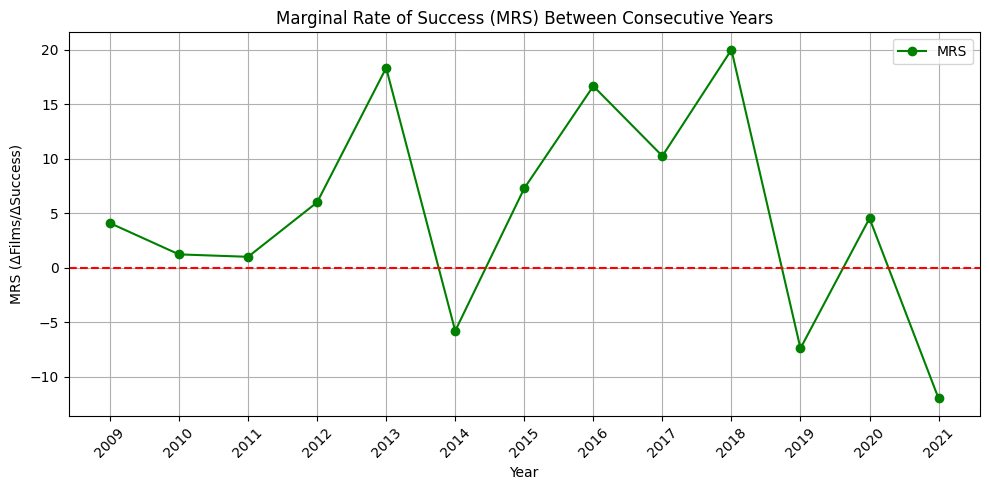

In [ ]:
# Given data for our sample
films_produced = total_films_sample
success_values = films_sample
print(films_produced)
print(success_values)

delta_films = np.diff(films_produced)
delta_success = np.diff(success_values)

start_year = 2008
years = np.arange(start_year, start_year + len(films_produced))

# Step 1: Calculate the differences
delta_films = np.diff(films_produced)
delta_success = np.diff(success_values)

# Step 2: Calculate the Marginal Rate of Success (MRS) using difference quotient
mrs_values_sample = delta_films / delta_success

# Corresponding years for MRS
mrs_years = years[1:]  # MRS values correspond to differences between consecutive years

# Print the MRS values
for i, mrs in enumerate(mrs_values_sample):
    print(f"MRS between years {years[i]} and {years[i+1]}: {mrs:.8f}")

# Plotting MRS with years on the x-axis
plt.figure(figsize=(10, 5))
plt.plot(mrs_years, mrs_values_sample, marker='o', linestyle='-', color='green', label="MRS")
plt.axhline(0, color='red', linestyle='--')
plt.title("Marginal Rate of Success (MRS) Between Consecutive Years")
plt.xlabel("Year")
plt.ylabel("MRS (ΔFilms/ΔSuccess)")
plt.xticks(ticks=mrs_years, labels=[f"{year}" for year in mrs_years], rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

[780, 855, 879, 975, 1008, 1062, 1160, 1221, 1265, 1336, 1426, 1566, 1548, 1552, 1678, 1757, 1776, 1500, 1702]
[163, 185, 167, 200, 241, 211, 216, 222, 247, 228, 258, 256, 290, 292, 311, 327, 298, 174, 195]
MRS between years 2003 and 2004: 3.40909091
MRS between years 2004 and 2005: -1.33333333
MRS between years 2005 and 2006: 2.90909091
MRS between years 2006 and 2007: 0.80487805
MRS between years 2007 and 2008: -1.80000000
MRS between years 2008 and 2009: 19.60000000
MRS between years 2009 and 2010: 10.16666667
MRS between years 2010 and 2011: 1.76000000
MRS between years 2011 and 2012: -3.73684211
MRS between years 2012 and 2013: 3.00000000
MRS between years 2013 and 2014: -70.00000000
MRS between years 2014 and 2015: -0.52941176
MRS between years 2015 and 2016: 2.00000000
MRS between years 2016 and 2017: 6.63157895
MRS between years 2017 and 2018: 4.93750000
MRS between years 2018 and 2019: -0.65517241
MRS between years 2019 and 2020: 2.22580645
MRS between years 2020 and 2021: 9.6

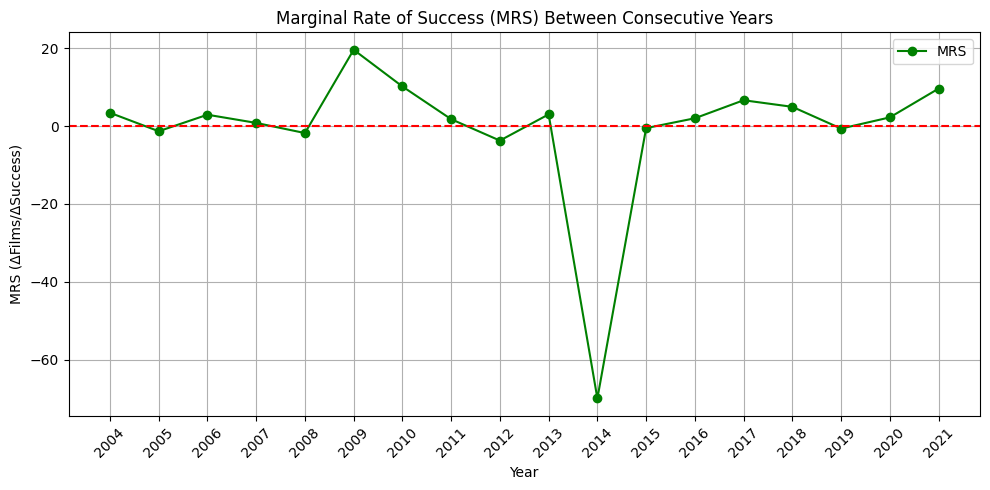

In [ ]:
# Given data for all years
films_produced = total_films
success_values = films
print(films_produced)
print(success_values)

delta_films = np.diff(films_produced)
delta_success = np.diff(success_values)

start_year = 2003
years = np.arange(start_year, start_year + len(films_produced))

# Step 1: Calculate the differences
delta_films = np.diff(films_produced)
delta_success = np.diff(success_values)

# Step 2: Calculate the Marginal Rate of Success (MRS) using difference quotient
mrs_values = delta_films / delta_success

# Corresponding years for MRS
mrs_years = years[1:]  # MRS values correspond to differences between consecutive years

# Print the MRS values
for i, mrs in enumerate(mrs_values):
    print(f"MRS between years {years[i]} and {years[i+1]}: {mrs:.8f}")

# Plotting MRS with years on the x-axis
plt.figure(figsize=(10, 5))
plt.plot(mrs_years, mrs_values, marker='o', linestyle='-', color='green', label="MRS")
plt.axhline(0, color='red', linestyle='--')
plt.title("Marginal Rate of Success (MRS) Between Consecutive Years")
plt.xlabel("Year")
plt.ylabel("MRS (ΔFilms/ΔSuccess)")
plt.xticks(ticks=mrs_years, labels=[f"{year}" for year in mrs_years], rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
mrs_values[9:-1]

array([ 9.2       ,  3.97142857,  3.8       , -0.42857143,  3.90625   ,
        1.39285714, -0.24637681,  2.29770992,  8.30434783])

In [ ]:
#Data for all films (LUMIERE)
films_produced = total_films[6:]
success_values = films
mrs_values1 = mrs_values[5:]

print(len(films_produced))
print(len(mrs_values1))

# Define colors using Plotly Express
colors = px.colors.sequential.Burgyl
color_for_bars = colors[1]  # Light color
color_for_lines = colors[6]  # Darker color
color_for_lines2 = colors[3]

# Fit a 2nd degree polynomial to the MRS data
coeffs = np.polyfit(films_produced, mrs_values1, 2)  # 3nd degree polynomial
p = np.poly1d(coeffs)

# Generate x values for the polynomial line (smooth curve)
x_poly = np.linspace(min(films_produced), max(films_produced), 300)
y_poly = p(x_poly)

# Find the x value of the maximum point on the curve
max_y_index = np.argmax(y_poly)  # Index of the maximum y value
max_x_value = x_poly[max_y_index]  # Corresponding x value
max_y_value = y_poly[max_y_index]  # Corresponding y value

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=x_poly,
    y=y_poly,
    mode='lines',
    name='MRS - Polynomial Fit',
    line=dict(color=color_for_bars)
))
fig.add_shape(type="line",
              x0=max_x_value,
              y0=-20,
              x1=max_x_value,
              y1=max_y_value,
              line=dict( width=2, dash="dash", color=color_for_lines2)
              )


fig.add_annotation(x=max_x_value, y=max_y_value, yshift=10,
                   text="Point of Diminishing Returns",
                   font=dict(size=12, color="black"),
                   align="center",
                   opacity=1)

# Update layout
fig.update_layout(
    title='MRS per Yearly Film Production',
    xaxis_title='Films Released',
    yaxis_title='MRS Value',
    yaxis=dict(
        range=[-20, 20],
        title='MRS Value',
        titlefont=dict(color='black', size=14),
        tickfont=dict(color='black', size=14),
        linecolor='black'
    ),
    plot_bgcolor='white',  # Remove background color
    paper_bgcolor='white', # Remove outer background color
    legend=dict(x=0, y=0, traceorder='normal', font=dict(size=12)),
    xaxis=dict(
        zerolinecolor='lightgrey',
        titlefont=dict(color='black', size=14),
        tickfont=dict(color='black', size=14),
        gridcolor='white',
        linewidth=1,
        linecolor='black'
    ),
    width=800,  # Set the width of the plot
    height=500  # Set the height of the plot
)
fig.write_image(path+"plotly_graph_MRS.pdf")

# Show plot
print(max_y_value, max_x_value)
fig.show()

13
13
20.077748025945766 1160.0


In [ ]:
# Data from our sample
films_produced = total_films[6:-1]
mrs_values1 = mrs_values_sample[:-1]
print(mrs_values1)
print(films_produced)

print(len(films_produced))
print(len(mrs_values1))

# Define colors using Plotly Express
colors = px.colors.sequential.Burgyl
color_for_bars = colors[1]  # Light color for bars
color_for_lines = colors[6]  # Darker color for lines
color_for_lines2 = colors[3]

# Fit a 2nd degree polynomial to the MRS data
coeffs = np.polyfit(films_produced, mrs_values1, 2)  # 3nd degree polynomial
p = np.poly1d(coeffs)

# Generate x values for the polynomial line (smooth curve)
x_poly = np.linspace(min(films_produced), max(films_produced), 300)
y_poly = p(x_poly)

# Find the x value of the maximum point on the polynomial curve
max_y_index = np.argmax(y_poly)  # Index of the maximum y value
max_x_value = x_poly[max_y_index]  # Corresponding x value
max_y_value = y_poly[max_y_index]

fig = go.Figure()

# Add trace for MRS value

# Add trace for the polynomial fit
fig.add_trace(go.Scatter(
    x=x_poly,
    y=y_poly,
    mode='lines',
    name='MRS - Polynomial Fit',
    line=dict(color=color_for_bars)
))
fig.add_shape(type="line",
              x0=max_x_value,
              y0=-20,
              x1=max_x_value,
              y1=max_y_value,
              line=dict( width=2, dash="dash", color=color_for_lines2)
              )

fig.add_annotation(x=max_x_value, y=max_y_value, yshift=10,
                   text="Point of Diminishing Returns",
                   font=dict(size=12, color="black"),
                   align="center",
                   opacity=1)

# Update layout with secondary y-axis
fig.update_layout(
    title='MRS per Yearly Film Production',
    xaxis_title='Films Released',
    yaxis_title='MRS Value',
    yaxis=dict(
        range=[0, 10],
        title='MRS Value',
        titlefont=dict(color='black', size=14),
        tickfont=dict(color='black', size=14),
        linecolor='black'
    ),
    plot_bgcolor='white',  # Remove background color
    paper_bgcolor='white', # Remove outer background color
    legend=dict(x=0, y=0, traceorder='normal', font=dict(size=14)),
    xaxis=dict(
        range=[1150, 1690],
        zerolinecolor='lightgrey',
        titlefont=dict(color='black', size=14),
        tickfont=dict(color='black', size=14),
        gridcolor='white',
        linewidth=1,
        linecolor='black'
    ),
    width=800,  # Set the width of the plot
    height=500  # Set the height of the plot
)
fig.write_image(path+"plotly_graph_MRS.pdf")
print(max_x_value, max_y_value)
# Show plot
fig.show()

[ 4.09090909  1.22222222  1.          6.         18.33333333 -5.8
  7.28571429 16.66666667 10.25       20.         -7.4         4.53333333]
[1160, 1221, 1265, 1336, 1426, 1566, 1548, 1552, 1678, 1757, 1776, 1500]
12
12
1528.7759197324415 8.476831634527144
